
https://hazards.fema.gov/nri/data-resources

https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2

https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income

https://apps.bea.gov/regional/downloadzip.cfm

Packages

In [428]:
from google.colab import drive
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
from collections import Counter
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

##Connect to Directory

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


L's Directory

In [ ]:
% cd "/content/drive/MyDrive/cs6830/final"
% ls .

/content/drive/MyDrive/cs6830/final
Datasets/                               NRI_metadata_November2021.docx
HazardMitigationAssistanceProjects.csv  NRI_metadata_November2021.xml
NRIDataDictionary.csv                   NRI_Table_Counties.csv
NRI_HazardInfo.csv                      NRI_Table_States.csv


##Combine risk management with county population and state population

In [ ]:
#HazardMitigationAssistanceProjects
RiskManagement = pd.read_csv('Datasets/HazardMitigationAssistanceProjects.csv')
display(RiskManagement.dtypes)
# RiskManagement['yearInitiallyApproved'] = RiskManagement['dateInitiallyApproved'].str.split('-').str[0]
# display(RiskManagement.yearInitiallyApproved.unique())

region                         int64
stateNumberCode                int64
state                         object
countyCode                   float64
county                        object
programArea                   object
projectIdentifier             object
projectType                   object
projectTitle                 float64
projectCounties               object
numberOfProperties             int64
numberOfFinalProperties        int64
status                        object
subgrantee                    object
costSharePercentage          float64
projectAmount                float64
federalShareObligated        float64
programFy                      int64
dateInitiallyApproved         object
dateApproved                  object
dateClosed                    object
granteeTribalIndicator       float64
grantee                       object
disasterNumber               float64
benefitCostRatio             float64
netValueBenefits             float64
subgranteeTribalIndicator    float64
i

In [ ]:
# only keep data that from 2001 to 2022 to match population
# RiskManagement['yearInitiallyApproved'] = RiskManagement['yearInitiallyApproved'].astype(int)
# RevisedRiskMng = RiskManagement[RiskManagement.yearInitiallyApproved.between(2001, 2022)]
# display(Counter(RevisedRiskMng['yearInitiallyApproved']))
# display(len(sorted(RevisedRiskMng.stateNumberCode.unique())))
RevisedRiskMng = RiskManagement[RiskManagement.programFy.between(2001, 2022)]
display(Counter(RevisedRiskMng['programFy']))
display(Counter(RevisedRiskMng.programArea))
RevisedRiskMng = RevisedRiskMng[RevisedRiskMng.programArea == "HMGP"]

Counter({2001: 1060,
         2002: 817,
         2003: 979,
         2004: 1185,
         2005: 1865,
         2006: 595,
         2007: 1192,
         2008: 1679,
         2009: 1285,
         2010: 1245,
         2011: 2302,
         2012: 661,
         2013: 1367,
         2014: 969,
         2015: 889,
         2016: 1110,
         2017: 2024,
         2018: 1075,
         2019: 1147,
         2020: 291,
         2021: 21})

Counter({'FMA': 1796,
         'HMGP': 17587,
         'LPDM': 253,
         'PDM': 3783,
         'RFC': 98,
         'SRL': 241})

In [ ]:
pop2000 = pd.read_csv("Datasets/2000-2009.csv", encoding = "ISO-8859-1")
list(pop2000.columns)
pop2000 = pop2000[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2000', 'POPESTIMATE2001', 'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004', 'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007', 'POPESTIMATE2008', 'POPESTIMATE2009']]
display(pop2000.head())
display(pop2000.shape)
display(len(pop2000.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2000  POPESTIMATE2001  \
0      1       0  Alabama         Alabama          4451849          4464034   
1      1       1  Alabama  Autauga County            43872            44434   
2      1       3  Alabama  Baldwin County           141358           144988   
3      1       5  Alabama  Barbour County            29035            29223   
4      1       7  Alabama     Bibb County            19936            20942   

   POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0          4472420          4490591          4512190          4545049   
1            45157            45762            46933            47870   
2           148141           151707           156573           162564   
3            29289            29480            29458            29452   
4            20983            21037            21208            21375   

   POPESTIMATE2006  POPESTIMATE2007  POPESTIMATE2008  POPESTIMATE2009  
0          4597688          4637904          4677464          4708708  
1            49105            49834            50354            50756  
2           168516           172815           176212           179878  
3            29556            29736            29836            29737  
4            21285            21485            21589            21587

(3194, 14)

51

In [ ]:
pop2010 = pd.read_csv("Datasets/2010-2019.csv", encoding = "ISO-8859-1")
pop2010 = pop2010[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]
display(pop2010.head())
display(pop2010.shape)
display(len(pop2010.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2010  POPESTIMATE2011  \
0      1       0  Alabama         Alabama          4785437          4799069   
1      1       1  Alabama  Autauga County            54773            55227   
2      1       3  Alabama  Baldwin County           183112           186558   
3      1       5  Alabama  Barbour County            27327            27341   
4      1       7  Alabama     Bibb County            22870            22745   

   POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
0          4815588          4830081          4841799          4852347   
1            54954            54727            54893            54864   
2           190145           194885           199183           202939   
3            27169            26937            26755            26283   
4            22667            22521            22553            22566   

   POPESTIMATE2016  POPESTIMATE2017  POPESTIMATE2018  POPESTIMATE2019  
0          4863525          4874486          4887681          4903185  
1            55243            55390            55533            55869  
2           207601           212521           217855           223234  
3            25806            25157            24872            24686  
4            22586            22550            22367            22394

(3193, 14)

51

In [ ]:
pop2020 = pd.read_csv("Datasets/2020-2021.csv", encoding = "ISO-8859-1")
pop2020 = pop2020[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2020', 'POPESTIMATE2021']]
display(pop2020.head())
display(pop2020.shape)
display(len(pop2020.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2020  POPESTIMATE2021
0      1       0  Alabama         Alabama          5024803          5039877
1      1       1  Alabama  Autauga County            58877            59095
2      1       3  Alabama  Baldwin County           233140           239294
3      1       5  Alabama  Barbour County            25180            24964
4      1       7  Alabama     Bibb County            22223            22477

(3194, 6)

51

state population

In [ ]:
stPop2000 = pop2000[pop2000.COUNTY == 0]
stPop2010 = pop2010[pop2010.COUNTY == 0]
stPop2020 = pop2020[pop2020.COUNTY == 0]

In [ ]:
# merge 2000-2022 to one df
stPop = stPop2000.merge(stPop2010, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
stPop = stPop.merge(stPop2020, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
stPop.drop(stPop.iloc[:, 2:4], inplace = True, axis = 1)
stPop.rename(columns = {'STATE':'stateNumberCode','COUNTY':'countyCode'}, inplace = True)
display(stPop.columns)
display(stPop.shape)
display(stPop)


Index(['stateNumberCode', 'countyCode', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'POPESTIMATE2021'],
      dtype='object')

(51, 24)

stateNumberCode  countyCode  POPESTIMATE2000  POPESTIMATE2001  \
0                 1           0          4451849          4464034   
1                 2           0           627499           633316   
2                 4           0          5166697          5304417   
3                 5           0          2678288          2691068   
4                 6           0         33994571         34485623   
5                 8           0          4328070          4433068   
6                 9           0          3411726          3428433   
7                10           0           786411           794620   
8                11           0           571744           578042   
9                12           0         16047118         16353869   
10               13           0          8230161          8419594   
11               15           0          1211566          1218305   
12               16           0          1299551          1321170   
13               17           0         12437645         12507833   
14               18           0          6091649          6124967   
15               19           0          2928184          2929424   
16               20           0          2692810          2701456   
17               21           0          4048903          4069191   
18               22           0          4468979          4460816   
19               23           0          1277211          1284791   
20               24           0          5310579          5375033   
21               25           0          6363015          6411730   
22               26           0          9955308         10006093   
23               27           0          4933958          4982813   
24               28           0          2848310          2853313   
25               29           0          5606065          5643986   
26               30           0           903293           905873   
27               31           0          1713345          1717948   
28               32           0          2018211          2094509   
29               33           0          1240446          1256879   
30               34           0          8430921          8489469   
31               35           0          1820813          1828809   
32               36           0         18998044         19088978   
33               37           0          8079383          8203451   
34               38           0           641200           636267   
35               39           0         11363844         11396874   
36               40           0          3453943          3464729   
37               41           0          3430891          3470382   
38               42           0         12285504         12299533   
39               44           0          1050736          1058051   
40               45           0          4023570          4062701   
41               46           0           755694           758983   
42               47           0          5703243          5755443   
43               48           0         20945963         21332847   
44               49           0          2244314          2291250   
45               50           0           609903           612153   
46               51           0          7104533          7191304   
47               53           0          5911122          5987785   
48               54           0          1806962          1798582   
49               55           0          5374254          5408769   
50               56           0           493958           492982   

    POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0           4472420          4490591          4512190          4545049   
1            642691           650884           661569           669488   
2           5452108          5591206          5759425          5974834   
3           2704732          2722291          2746161          2776221   
4          34876194         35251107         

In [ ]:
# merge county pop from 2000-2022 into one df
pop = pop2000.merge(pop2010, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
pop = pop.merge(pop2020, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
# pop.rename(columns = {'STNAME':'state', 'CTYNAME':'county'}, inplace = True)
pop.drop(pop.iloc[:, 2:4], inplace = True, axis = 1)
pop.rename(columns = {'STATE':'stateNumberCode', 'COUNTY':'countyCode'}, inplace = True)
display(pop.columns)
pop.shape

Index(['stateNumberCode', 'countyCode', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'POPESTIMATE2021'],
      dtype='object')

(3188, 24)

In [ ]:
RiskMngPop = pop.merge(RevisedRiskMng, on=['stateNumberCode', 'countyCode'])
display(RiskMngPop.shape)
display(RiskMngPop.head())
RiskMngPop.countyCode.unique()

(17101, 50)

stateNumberCode  countyCode  POPESTIMATE2000  POPESTIMATE2001  \
0                1           0          4451849          4464034   
1                1           0          4451849          4464034   
2                1           0          4451849          4464034   
3                1           0          4451849          4464034   
4                1           0          4451849          4464034   

   POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0          4472420          4490591          4512190          4545049   
1          4472420          4490591          4512190          4545049   
2          4472420          4490591          4512190          4545049   
3          4472420          4490591          4512190          4545049   
4          4472420          4490591          4512190          4545049   

   POPESTIMATE2006  POPESTIMATE2007  ...     dateInitiallyApproved  \
0          4597688          4637904  ...  2020-09-10T04:00:00.000Z   
1          4597688          4637904  ...  2020-09-17T04:00:00.000Z   
2          4597688          4637904  ...  2020-08-21T04:00:00.000Z   
3          4597688          4637904  ...  2020-08-20T04:00:00.000Z   
4          4597688          4637904  ...  2020-09-10T04:00:00.000Z   

               dateApproved                dateClosed  granteeTribalIndicator  \
0  2020-09-10T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
1  2020-09-17T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
2  2020-08-21T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
3  2020-08-20T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
4  2021-07-14T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   

     grantee  disasterNumber  benefitCostRatio  netValueBenefits  \
0  Statewide          4426.0               0.0               0.0   
1  Statewide          4546.0               0.0               0.0   
2  Statewide          4554.0               0.0               0.0   
3  Statewide          4419.0               0.0               0.0   
4  Statewide          4406.0               0.0               0.0   

   subgranteeTribalIndicator                        id  
0                        0.0  625458d9c1418f298e586acf  
1                        0.0  625458d9c1418f298e586b53  
2                        0.0  625458d9c1418f298e586b54  
3                        0.0  625458d9c1418f298e586c0d  
4                        0.0  625458d9c1418f298e586ba3  

[5 rows x 50 columns]

array([  0,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,
        25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,
        77,  79,  81,  83,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133,  16,  20,  50,  68,  90, 110, 122, 150, 170, 180, 185,
       188, 220, 230, 290,  12,  85, 135, 137, 139, 141, 143, 145, 147,
       149,  86, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 187, 189, 191, 193, 195, 197, 199,
       201, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227,
       229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,
       255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279,
       281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305,
       307, 309, 311, 313, 315, 317, 319, 321, 203, 510, 186,   

In [ ]:
# add county population to risk
poplist = []
for index, row in RiskMngPop.iterrows():
  year = row['programFy']
  col = 'POPESTIMATE' + str(year - 1)
  poplist.append(row[col])

RiskMngPop = RiskMngPop.assign(countyPop = poplist)
display(RiskMngPop.shape)

(17101, 51)

In [ ]:
display(RiskMngPop.countyPop.describe())

count    1.710100e+04
mean     1.040648e+06
std      3.466707e+06
min      4.510000e+02
25%      3.027300e+04
50%      9.622800e+04
75%      4.987690e+05
max      3.951222e+07
Name: countyPop, dtype: float64

In [ ]:
RiskMngPop.columns

Index(['stateNumberCode', 'countyCode', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'region', 'state', 'county',
       'programArea', 'projectIdentifier', 'projectType', 'projectTitle',
       'projectCounties', 'numberOfProperties', 'numberOfFinalProperties',
       'status', 'subgrantee', 'costSharePercentage', 'projectAmount',
       'federalShareObligated', 'programFy', 'dateInitiallyApproved',
       'dateApproved', 'dateClosed', 'granteeTribalIndicator', 'grantee',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'subgranteeTribalIndicator',

In [ ]:
# Remove the pop columns for each year
RiskMngPop.drop(RiskMngPop.iloc[:, 2:24], inplace = True, axis = 1)
RiskMngPop.head()

stateNumberCode  countyCode  region    state     county programArea  \
0                1           0       4  Alabama  Statewide        HMGP   
1                1           0       4  Alabama  Statewide        HMGP   
2                1           0       4  Alabama  Statewide        HMGP   
3                1           0       4  Alabama  Statewide        HMGP   
4                1           0       4  Alabama  Statewide        HMGP   

  projectIdentifier                         projectType  projectTitle  \
0    DR-4426-0001-M  700.1: Management Costs - Salaries           NaN   
1    DR-4546-0001-M  700.1: Management Costs - Salaries           NaN   
2    DR-4554-0001-M  700.1: Management Costs - Salaries           NaN   
3    DR-4419-0001-M  700.1: Management Costs - Salaries           NaN   
4    DR-4406-0003-M  700.1: Management Costs - Salaries           NaN   

  projectCounties  ...              dateApproved                dateClosed  \
0       STATEWIDE  ...  2020-09-10T04:00:00.000Z  1970-01-01T00:00:00.000Z   
1       STATEWIDE  ...  2020-09-17T04:00:00.000Z  1970-01-01T00:00:00.000Z   
2       STATEWIDE  ...  2020-08-21T04:00:00.000Z  1970-01-01T00:00:00.000Z   
3       STATEWIDE  ...  2020-08-20T04:00:00.000Z  1970-01-01T00:00:00.000Z   
4       STATEWIDE  ...  2021-07-14T04:00:00.000Z  1970-01-01T00:00:00.000Z   

  granteeTribalIndicator    grantee  disasterNumber  benefitCostRatio  \
0                    0.0  Statewide          4426.0               0.0   
1                    0.0  Statewide          4546.0               0.0   
2                    0.0  Statewide          4554.0               0.0   
3                    0.0  Statewide          4419.0               0.0   
4                    0.0  Statewide          4406.0               0.0   

   netValueBenefits  subgranteeTribalIndicator                        id  \
0               0.0                        0.0  625458d9c1418f298e586acf   
1               0.0                        0.0  625458d9c1418f298e586b53   
2               0.0                        0.0  625458d9c1418f298e586b54   
3               0.0                        0.0  625458d9c1418f298e586c0d   
4               0.0                        0.0  625458d9c1418f298e586ba3   

  countyPop  
0   4887681  
1   4903185  
2   4903185  
3   4887681  
4   4887681  

[5 rows x 29 columns]

In [ ]:
RiskMngPop.countyCode.unique()

array([  0,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,
        25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,
        77,  79,  81,  83,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133,  16,  20,  50,  68,  90, 110, 122, 150, 170, 180, 185,
       188, 220, 230, 290,  12,  85, 135, 137, 139, 141, 143, 145, 147,
       149,  86, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 187, 189, 191, 193, 195, 197, 199,
       201, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227,
       229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,
       255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279,
       281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305,
       307, 309, 311, 313, 315, 317, 319, 321, 203, 510, 186,   

Add state population to df

In [ ]:
RevisedRiskMngPop = stPop.merge(RiskMngPop, on=['stateNumberCode'])
RevisedRiskMngPop.head()
RevisedRiskMngPop.drop(columns='countyCode_x')

stateNumberCode  POPESTIMATE2000  POPESTIMATE2001  POPESTIMATE2002  \
0                    1          4451849          4464034          4472420   
1                    1          4451849          4464034          4472420   
2                    1          4451849          4464034          4472420   
3                    1          4451849          4464034          4472420   
4                    1          4451849          4464034          4472420   
...                ...              ...              ...              ...   
17096               56           493958           492982           497069   
17097               56           493958           492982           497069   
17098               56           493958           492982           497069   
17099               56           493958           492982           497069   
17100               56           493958           492982           497069   

       POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  POPESTIMATE2006  \
0              4490591          4512190          4545049          4597688   
1              4490591          4512190          4545049          4597688   
2              4490591          4512190          4545049          4597688   
3              4490591          4512190          4545049          4597688   
4              4490591          4512190          4545049          4597688   
...                ...              ...              ...              ...   
17096           499189           502988           506242           512841   
17097           499189           502988           506242           512841   
17098           499189           502988           506242           512841   
17099           499189           502988           506242           512841   
17100           499189           502988           506242           512841   

       POPESTIMATE2007  POPESTIMATE2008  ...              dateApproved  \
0              4637904          4677464  ...  2020-09-10T04:00:00.000Z   
1              4637904          4677464  ...  2020-09-17T04:00:00.000Z   
2              4637904          4677464  ...  2020-08-21T04:00:00.000Z   
3              4637904          4677464  ...  2020-08-20T04:00:00.000Z   
4              4637904          4677464  ...  2021-07-14T04:00:00.000Z   
...                ...              ...  ...                       ...   
17096           523414           532981  ...  2015-01-22T05:00:00.000Z   
17097           523414           532981  ...  2020-05-06T04:00:00.000Z   
17098           523414           532981  ...  2021-10-21T04:00:00.000Z   
17099           523414           532981  ...  2003-09-25T04:00:00.000Z   
17100           523414           532981  ...  2021-08-25T04:00:00.000Z   

                     dateClosed  granteeTribalIndicator    grantee  \
0      1970-01-01T00:00:00.000Z                     0.0  Statewide   
1      1970-01-01T00:00:00.000Z                     0.0  Statewide   
2      1970-01-01T00:00:00.000Z                     0.0  Statewide   
3      1970-01-01T00:00:00.000Z                     0.0  Statewide   
4      1970-01-01T00:00:00.000Z                     0.0  Statewide   
...                         ...                     ...        ...   
17096  2015-01-23T05:00:00.000Z                     0.0  Statewide   
17097  2020-05-06T04:00:00.000Z                     0.0  Statewide   
17098  2021-10-22T04:00:00.000Z                     0.0  Statewide   
17099  2005-06-06T04:00:00.000Z                     0.0  Statewide   
17100  2021-08-02T04:00:00.000Z                     0.0  Statewide   

       disasterNumber  benefitCostRatio  netValueBenefits  \
0              4426.0             0.000               0.0   
1              4546.0             0.000               0.0   
2              4554.0             0.000               0.0   
3              4419.0             0.000               0.0   
4              4406.0             0.000               0.0   
...               ...               ...               ...   


In [ ]:
# add county population to risk
stPoplist = []
for index, row in RevisedRiskMngPop.iterrows():
  year = row['programFy']
  col = 'POPESTIMATE' + str(year - 1)
  stPoplist.append(row[col])

RevisedRiskMngPop = RevisedRiskMngPop.assign(statePop = stPoplist)
display(RevisedRiskMngPop.shape)
RevisedRiskMngPop.columns


RevisedRiskMngPop.drop(RevisedRiskMngPop.iloc[:, 1:24], inplace = True, axis = 1)
RevisedRiskMngPop.columns
RevisedRiskMngPop.rename(columns = {'countyCode_y':'countyCode'}, inplace = True)

(17101, 53)

In [ ]:
RevisedRiskMngPop.countyCode.unique()

array([  0,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,
        25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,
        77,  79,  81,  83,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133,  16,  20,  50,  68,  90, 110, 122, 150, 170, 180, 185,
       188, 220, 230, 290,  12,  85, 135, 137, 139, 141, 143, 145, 147,
       149,  86, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 187, 189, 191, 193, 195, 197, 199,
       201, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227,
       229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,
       255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279,
       281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305,
       307, 309, 311, 313, 315, 317, 319, 321, 203, 510, 186,   

In [ ]:
RevisedRiskMngPop.columns

Index(['stateNumberCode', 'countyCode', 'region', 'state', 'county',
       'programArea', 'projectIdentifier', 'projectType', 'projectTitle',
       'projectCounties', 'numberOfProperties', 'numberOfFinalProperties',
       'status', 'subgrantee', 'costSharePercentage', 'projectAmount',
       'federalShareObligated', 'programFy', 'dateInitiallyApproved',
       'dateApproved', 'dateClosed', 'granteeTribalIndicator', 'grantee',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'subgranteeTribalIndicator', 'id', 'countyPop', 'statePop'],
      dtype='object')

In [ ]:
RevisedRiskMngPop.shape

(17101, 30)

----------------------------------------------------------------------------

In [ ]:
RevisedRiskMngPop

stateNumberCode  countyCode  region    state     county programArea  \
0                    1           0       4  Alabama  Statewide        HMGP   
1                    1           0       4  Alabama  Statewide        HMGP   
2                    1           0       4  Alabama  Statewide        HMGP   
3                    1           0       4  Alabama  Statewide        HMGP   
4                    1           0       4  Alabama  Statewide        HMGP   
...                ...         ...     ...      ...        ...         ...   
17096               56          33       8  Wyoming   Sheridan        HMGP   
17097               56          33       8  Wyoming   Sheridan        HMGP   
17098               56          35       8  Wyoming   Sublette        HMGP   
17099               56          39       8  Wyoming      Teton        HMGP   
17100               56          45       8  Wyoming     Weston        HMGP   

      projectIdentifier                                        projectType  \
0        DR-4426-0001-M                 700.1: Management Costs - Salaries   
1        DR-4546-0001-M                 700.1: Management Costs - Salaries   
2        DR-4554-0001-M                 700.1: Management Costs - Salaries   
3        DR-4419-0001-M                 700.1: Management Costs - Salaries   
4        DR-4406-0003-M                 700.1: Management Costs - Salaries   
...                 ...                                                ...   
17096    DR-4007-0009-R  402.1: Infrastructure Protective Measures (Roa...   
17097    DR-4227-0004-R  400.1: Utility Protective Measures (Electric, ...   
17098    DR-5241-0006-R            403.1: Stormwater Management - Culverts   
17099    DR-1351-0001-R  106.1: Other Non Construction (Regular Project...   
17100    DR-4306-0004-R  400.1: Utility Protective Measures (Electric, ...   

       projectTitle    projectCounties  ...                dateClosed  \
0               NaN          STATEWIDE  ...  1970-01-01T00:00:00.000Z   
1               NaN          STATEWIDE  ...  1970-01-01T00:00:00.000Z   
2               NaN          STATEWIDE  ...  1970-01-01T00:00:00.000Z   
3               NaN          STATEWIDE  ...  1970-01-01T00:00:00.000Z   
4               NaN          STATEWIDE  ...  1970-01-01T00:00:00.000Z   
...             ...                ...  ...                       ...   
17096           NaN           SHERIDAN  ...  2015-01-23T05:00:00.000Z   
17097           NaN  JOHNSON; SHERIDAN  ...  2020-05-06T04:00:00.000Z   
17098           NaN           SUBLETTE  ...  2021-10-22T04:00:00.000Z   
17099           NaN              TETON  ...  2005-06-06T04:00:00.000Z   
17100           NaN             WESTON  ...  2021-08-02T04:00:00.000Z   

       granteeTribalIndicator    grantee disasterNumber  benefitCostRatio  \
0                         0.0  Statewide         4426.0             0.000   
1                         0.0  Statewide         4546.0             0.000   
2                         0.0  Statewide         4554.0             0.000   
3                         0.0  Statewide         4419.0             0.000   
4                         0.0  Statewide         4406.0             0.000   
...                       ...        ...            ...               ...   
17096                     0.0  Statewide         4007.0             1.810   
17097                     0.0  Statewide         4227.0             2.938   
17098                     0.0  Statewide         5241.0             1.040   
17099                     0.0  Statewide         1351.0             1.119   
17100                     0.0  Statewide         4306.0             6.222   

       netValueBenefits  subgranteeTribalIndicator                        id  \
0                   0.0                        0.0  625458d9c1418f298e586acf   
1                   0.0                        0.0  625458d9c1418f298e586b53   
2                   0.0                        0.0  625458d9c1418f298e586b54   
3          

In [ ]:
RevisedRiskMngPop.projectType.unique()

array(['700.1: Management Costs - Salaries',
       '600.1: Warning Systems (as a Component of a Planned, Adopted, and Exercised Risk Reduction Plan)',
       '206.1: Safe Room (Tornado and Severe Wind Shelter) - Private Structures',
       '700.1: Management Costs - Salaries; \n700.2: Management Costs - Equipment; \n700.4: Management Costs - Supplies',
       '700.1: Management Costs - Salaries; \n700.2: Management Costs - Equipment; \n700.3: Management Costs - Office Space Rental; \n700.4: Management Costs - Supplies',
       '92.1: State Multihazard Mitigation Plan',
       '91.1: Local Multihazard Mitigation Plan',
       '200.1: Acquisition of Private Real Property (Structures and Land) - Riverine',
       '601.1: Generators',
       '206.2: Safe Room (Tornado and Severe Wind Shelter) - Public Structures',
       '205.8: Retrofitting Public Structures - Wind',
       '202.1: Elevation of Private Structures - Riverine',
       '202.2: Elevation of Private Structures - Coastal',
   

In [ ]:
RevisedRiskMngPop = RevisedRiskMngPop[RevisedRiskMngPop.projectAmount!=0]

In [ ]:
RevisedRiskMngPop.describe()

stateNumberCode    countyCode        region  projectTitle  \
count     17095.000000  17095.000000  17095.000000           0.0   
mean         26.794267     76.300029      5.105645           NaN   
std          15.996317     84.907629      2.188646           NaN   
min           1.000000      0.000000      1.000000           NaN   
25%          12.000000     19.000000      4.000000           NaN   
50%          27.000000     57.000000      4.000000           NaN   
75%          40.000000    109.000000      6.000000           NaN   
max          56.000000    840.000000     10.000000           NaN   

       numberOfProperties  numberOfFinalProperties  costSharePercentage  \
count        17095.000000             17095.000000         17095.000000   
mean             6.030594                 5.048201             0.759175   
std            101.847221                96.508354             0.105850   
min              0.000000                 0.000000             0.000000   
25%              0.000000                 0.000000             0.750000   
50%              0.000000                 0.000000             0.750000   
75%              1.000000                 1.000000             0.750000   
max           8043.000000              8043.000000             1.000000   

       projectAmount  federalShareObligated     programFy  \
count   1.709500e+04           1.709500e+04  17095.000000   
mean    9.671715e+05           6.351146e+05   2010.397719   
std     9.548079e+06           7.378663e+06      5.372118   
min     5.200000e+01           1.000000e+00   2001.000000   
25%     4.005650e+04           3.000000e+04   2006.000000   
50%     1.268310e+05           9.097200e+04   2011.000000   
75%     4.960255e+05           3.374538e+05   2015.000000   
max     7.290000e+08           6.783164e+08   2021.000000   

       granteeTribalIndicator  disasterNumber  benefitCostRatio  \
count            17095.000000    17095.000000      1.709500e+04   
mean                 0.004446     2801.735595      2.946653e+02   
std                  0.066530     1300.886379      2.681466e+04   
min                  0.000000     1344.000000      0.000000e+00   
25%                  0.000000     1610.000000      0.000000e+00   
50%                  0.000000     1970.000000      1.000000e+00   
75%                  0.000000     4223.000000      1.858000e+00   
max                  1.000000     5378.000000      2.479070e+06   

       netValueBenefits  subgranteeTribalIndicator     countyPop      statePop  
count      1.709300e+04               17095.000000  1.709500e+04  1.709500e+04  
mean       1.313664e+07                   0.007839  1.037440e+06  8.981629e+06  
std        9.722445e+08                   0.088190  3.453602e+06  8.917555e+06  
min        0.000000e+00                   0.000000  4.510000e+02  4.939580e+05  
25%        0.000000e+00                   0.000000  3.023250e+04  3.141550e+06  
50%        2.142000e+04                   0.000000  9.620400e+04  4.887681e+06  
75%        8.775420e+05                   0.000000  4.986430e+05  1.144518e+07  
max        8.984396e+10                   1.000000  3.951222e+07  3.951222e+07

In [ ]:
RevisedRiskMngPop[['projectAmount']].sort_values(by='projectAmount',ascending=False)

projectAmount
6958     729000000.0
11197    518028780.0
11253    513728083.0
11373    408830271.0
15226    217189890.0
...              ...
4164           275.0
11387          200.0
15125          144.0
15704          124.0
429             52.0

[17095 rows x 1 columns]

In [ ]:
RevisedRiskMngPop.programFy.unique()

array([2019, 2020, 2014, 2002, 2003, 2018, 2009, 2016, 2005, 2008, 2010,
       2011, 2004, 2012, 2001, 2007, 2006, 2013, 2015, 2017, 2021])

# Add counts to risk project

In [ ]:
# ADD COUNT TO PROJECT BASED ON COUNTY
project_county_count = RevisedRiskMngPop.groupby(["stateNumberCode", "countyCode", "programFy"]).size().reset_index(name="count")
project_county_count
project_info = project_county_count.merge(RevisedRiskMngPop, on=['stateNumberCode', 'countyCode', 'programFy'])
project_state_count = RevisedRiskMngPop.groupby(["stateNumberCode", "programFy"]).size().reset_index(name="stateCount")
project_info = project_state_count.merge(project_info, on=["stateNumberCode", "programFy"])
project_info.head()

stateNumberCode  programFy  stateCount  countyCode  count  region    state  \
0                1       2001           3           1      1       4  Alabama   
1                1       2001           3          47      1       4  Alabama   
2                1       2001           3          89      1       4  Alabama   
3                1       2002           3           0      2       4  Alabama   
4                1       2002           3           0      2       4  Alabama   

      county programArea projectIdentifier  ...                dateClosed  \
0    Autauga        HMGP    DR-1352-0005-R  ...  2007-08-07T04:00:00.000Z   
1     Dallas        HMGP    DR-1352-0004-R  ...  2006-10-20T04:00:00.000Z   
2    Madison        HMGP    DR-1362-0003-R  ...  2006-05-23T04:00:00.000Z   
3  Statewide        HMGP    DR-1399-0001-R  ...  2008-06-06T04:00:00.000Z   
4  Statewide        HMGP    DR-1399-0002-F  ...  2008-06-20T04:00:00.000Z   

   granteeTribalIndicator    grantee  disasterNumber  benefitCostRatio  \
0                     0.0  Statewide          1352.0             0.000   
1                     0.0  Statewide          1352.0             1.483   
2                     0.0  Statewide          1362.0             0.000   
3                     0.0  Statewide          1399.0             0.000   
4                     0.0  Statewide          1399.0             0.000   

  netValueBenefits subgranteeTribalIndicator                        id  \
0              0.0                       0.0  625458dac1418f298e5870b6   
1         264947.0                       0.0  625458dec1418f298e58b2c8   
2              0.0                       0.0  625458dfc1418f298e58c6ad   
3              0.0                       0.0  625458d9c1418f298e586ce5   
4              0.0                       0.0  625458dac1418f298e586e34   

   countyPop  statePop  
0      43872   4451849  
1      46181   4451849  
2     277868   4451849  
3    4464034   4464034  
4    4464034   4464034  

[5 rows x 32 columns]

In [ ]:
project_info.countyCode.unique()

array([  1,  47,  89,   0,  37,   3,  15,  61,  69,  71,  73,  81,  97,
       103, 111, 127, 131, 133,   7,   9,  13,  17,  21,  23,  25,  27,
        31,  33,  35,  39,  41,  45,  51,  53,  57,  59,  67,  75,  77,
        83,  91,  93,  95,  99, 101, 107, 113, 115, 117, 121, 123, 125,
       129,   5,  19,  43,  55,  79, 109,  49,  87, 105,  11,  29,  63,
        65, 119,  50,  20,  90, 122, 170, 180, 185, 150, 188,  16, 110,
       290,  68, 220, 230,  12, 137, 143, 145, 135, 147,  85, 141, 149,
       139,  86, 277, 311, 317, 153, 169, 171, 175, 177, 179, 187, 189,
       205, 207, 235, 255, 259, 261, 269, 291, 293, 305, 321, 191, 233,
       267, 289, 151, 155, 157, 159, 161, 167, 173, 183, 193, 195, 197,
       201, 209, 211, 213, 215, 217, 219, 221, 223, 225, 229, 237, 239,
       241, 243, 245, 247, 249, 251, 253, 257, 271, 273, 275, 279, 281,
       285, 287, 295, 299, 301, 303, 307, 309, 313, 315, 319, 163, 165,
       181, 199, 227, 231, 263, 265, 283, 297, 203, 510, 186,   

In [ ]:
agg_func = {'count':'sum', 'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum'}
county_project = project_info.groupby(['stateNumberCode','countyCode', 'state', 'county', 'programFy', 'countyPop']).agg(agg_func).reset_index()
county_project['proposed_amount_per_person'] = county_project['projectAmount'] / county_project['countyPop']
county_project['federal_share_per_person'] = county_project['federalShareObligated'] / county_project['countyPop']
county_project['federal_share_percentage'] = county_project['federalShareObligated'] / county_project['projectAmount']
county_project.county = county_project.county.str.strip(" (city)")
county_project

stateNumberCode  countyCode    state     county  programFy  countyPop  \
0                   1           0  Alabama  Statewide       2002    4464034   
1                   1           0  Alabama  Statewide       2003    4472420   
2                   1           0  Alabama  Statewide       2004    4490591   
3                   1           0  Alabama  Statewide       2005    4512190   
4                   1           0  Alabama  Statewide       2008    4637904   
...               ...         ...      ...        ...        ...        ...   
7590               56          33  Wyoming   Sheridan       2011      29148   
7591               56          33  Wyoming   Sheridan       2015      29852   
7592               56          35  Wyoming   Sublette       2018       9745   
7593               56          39  Wyoming      Teton       2001      18367   
7594               56          45  Wyoming     Weston       2017       7220   

      count  costSharePercentage  projectAmount  federalShareObligated  \
0         4             0.540000      610503.00              422891.00   
1        16             0.657500     1189355.00              851719.00   
2         4             0.750000     3164577.00             2373433.00   
3         4             0.845000     4257806.00             3371824.00   
4         9             0.916667      221048.00              199798.02   
...     ...                  ...            ...                    ...   
7590      4             0.750000      227143.00              170358.00   
7591      1             0.750000      304817.00              228612.81   
7592      1             0.750000      311751.67              233813.75   
7593      1             0.750000      120791.00               90593.00   
7594      1             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0             2798.0             0.000               0.0   
1             5788.0             0.000               0.0   
2             3098.0             0.000               0.0   
3             3210.0             0.000               0.0   
4             5383.0             0.000               0.0   
...              ...               ...               ...   
7590          8014.0             2.159          535503.0   
7591          4227.0             2.938         1190747.0   
7592          5241.0             1.040          660704.0   
7593          1351.0             1.119          139210.0   
7594          4306.0             6.222         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.136760                  0.094733   
1                       0.265931                  0.190438   
2                       0.704713                  0.528535   
3                       0.943623                  0.747270   
4                       0.047661                  0.043079   
...                          ...                       ...   
7590                    7.792747                  5.844586   
7591                   10.210941                  7.658207   
7592                   31.990936                 23.993202   
7593                    6.576523                  4.932379   
7594                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.692693  
1                     0.716118  
2                     0.750000  
3                     0.791916  
4                     0.903867  
...                        ...  
7590                  0.750003  
7591                  0.750000  
7592                  0.750000  
7593                  0.749998  
7594                  0.750000  

[7595 rows x 16 columns]

In [ ]:
agg_func = {'countyPop': 'mean', 'count': 'sum', 'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum', 'proposed_amount_per_person': 'mean', 'federal_share_per_person': 'mean', 'federal_share_percentage':'mean'}
county_project_avg = county_project.groupby(['stateNumberCode', 'countyCode', 'state', 'county']).agg(agg_func).reset_index()
county_project_avg

stateNumberCode  countyCode    state     county     countyPop  count  \
0                   1           0  Alabama  Statewide  4.706828e+06     99   
1                   1           1  Alabama    Autauga  4.914500e+04     36   
2                   1           3  Alabama    Baldwin  1.793134e+05    673   
3                   1           5  Alabama    Barbour  2.959700e+04      2   
4                   1           7  Alabama       Bibb  2.170500e+04     46   
...               ...         ...      ...        ...           ...    ...   
2532               56          27  Wyoming   Niobrara  2.488000e+03      1   
2533               56          33  Wyoming   Sheridan  2.950000e+04      5   
2534               56          35  Wyoming   Sublette  9.745000e+03      1   
2535               56          39  Wyoming      Teton  1.836700e+04      1   
2536               56          45  Wyoming     Weston  7.220000e+03      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.886964    18167898.17            15219667.32   
1                0.699074     1718574.00             1224887.00   
2                0.741669    28518186.00            24040371.25   
3                0.830000       21338.00               18845.00   
4                0.735000     2931436.47             2146000.13   
...                   ...            ...                    ...   
2532             0.750000      454991.11              341243.34   
2533             0.750000      531960.00              398970.81   
2534             0.750000      311751.67              233813.75   
2535             0.750000      120791.00               90593.00   
2536             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            94212.0          0.000000               0.0   
1            29971.0          2.788352        19096405.0   
2           116299.0          4.959370       293109375.0   
3             3394.0          1.089000          165806.0   
4            18078.0          4.365889        14733224.0   
...              ...               ...               ...   
2532          4227.0          1.000000          507840.0   
2533         12241.0          2.548500         1726250.0   
2534          5241.0          1.040000          660704.0   
2535          1351.0          1.119000          139210.0   
2536          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.279652                  0.233568   
1                       3.886101                  2.769485   
2                      19.429245                 16.506251   
3                       0.361297                  0.319227   
4                      45.505311                 33.360198   
...                          ...                       ...   
2532                  182.874240                137.155683   
2533                    9.001844                  6.751397   
2534                   31.990936                 23.993202   
2535                    6.576523                  4.932379   
2536                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.878059  
1                     0.700984  
2                     0.748560  
3                     0.830672  
4                     0.722741  
...                        ...  
2532                  0.750000  
2533                  0.750002  
2534                  0.750000  
2535                  0.749998  
2536                  0.750000  

[2537 rows x 15 columns]

state level

In [ ]:
agg_func = {'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'mean'}
state_project = project_info.groupby(['stateNumberCode', 'stateCount', 'state', 'programFy', 'statePop']).agg(agg_func).reset_index()

In [ ]:
state_project['proposed_amount_per_person'] = state_project['projectAmount'] / state_project['statePop']
state_project['federal_share_per_person'] = state_project['federalShareObligated'] / state_project['statePop']
state_project['federal_share_percentage'] = state_project['federalShareObligated'] / state_project['projectAmount']
state_project

stateNumberCode  stateCount    state  programFy  statePop  \
0                  1           3  Alabama       2001   4451849   
1                  1           3  Alabama       2002   4464034   
2                  1           4  Alabama       2020   4903185   
3                  1           6  Alabama       2007   4597688   
4                  1          14  Alabama       2012   4799069   
..               ...         ...      ...        ...       ...   
662               56           4  Wyoming       2015    582531   
663               56           4  Wyoming       2018    578931   
664               56           6  Wyoming       2011    564487   
665               56           6  Wyoming       2017    584215   
666               56           6  Wyoming       2020    578759   

     costSharePercentage  projectAmount  federalShareObligated  \
0               0.736667      379244.00              281315.00   
1               0.603333      661781.00              460075.00   
2               1.000000      689514.00              682514.00   
3               0.748333     2010414.00             1503000.00   
4               0.729286     1660138.00             1106418.00   
..                   ...            ...                    ...   
662             0.812500      836048.11              634097.65   
663             0.812500      916598.22              697839.94   
664             0.750000     1492391.00              816983.00   
665             0.833333     1187364.31              912781.88   
666             0.786667     1358666.89             1022563.61   

     disasterNumber  benefitCostRatio  netValueBenefits  \
0            4066.0          0.494333      8.831567e+04   
1            4197.0          0.000000      0.000000e+00   
2           18218.0          0.000000      0.000000e+00   
3           10122.0         60.212667      3.720314e+06   
4           57118.0          3.291000      9.455278e+05   
..              ...               ...               ...   
662         16908.0          0.984500      4.246468e+05   
663         20964.0          2.476250      9.097618e+05   
664         24042.0          0.938500      3.556805e+05   
665         25920.0          3.345333      2.000436e+06   
666         32082.0          0.000000      0.000000e+00   

     proposed_amount_per_person  federal_share_per_person  \
0                      0.085188                  0.063191   
1                      0.148247                  0.103063   
2                      0.140626                  0.139198   
3                      0.437266                  0.326903   
4                      0.345929                  0.230548   
..                          ...                       ...   
662                    1.435199                  1.088522   
663                    1.583260                  1.205394   
664                    2.643800                  1.447302   
665                    2.032410                  1.562407   
666                    2.347552                  1.766821   

     federal_share_percentage  
0                    0.741778  
1                    0.695207  
2                    0.989848  
3                    0.747607  
4                    0.666461  
..                        ...  
662                  0.758446  
663                  0.761337  
664                  0.547432  
665                  0.768746  
666                  0.752623  

[667 rows x 14 columns]

In [ ]:
agg_func = {'statePop': 'mean', 'stateCount': 'sum','costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum', 'proposed_amount_per_person': 'mean', 'federal_share_per_person': 'mean', 'federal_share_percentage':'mean'}
state_project_avg = state_project.groupby(['stateNumberCode', 'state']).agg(agg_func).reset_index()
state_project_avg

stateNumberCode                 state      statePop  stateCount  \
0                 1               Alabama  4.684071e+06        1419   
1                 2                Alaska  6.979447e+05         133   
2                 4               Arizona  6.088689e+06          66   
3                 5              Arkansas  2.873027e+06         278   
4                 6            California  3.759234e+07         667   
5                 8              Colorado  5.149946e+06         120   
6                 9           Connecticut  3.558241e+06         141   
7                10              Delaware  8.879635e+05          38   
8                11  District of Columbia  6.262507e+05          16   
9                12               Florida  1.873995e+07        1656   
10               13               Georgia  9.804005e+06         505   
11               15                Hawaii  1.319793e+06          65   
12               16                 Idaho  1.586617e+06          51   
13               17              Illinois  1.272063e+07         180   
14               18               Indiana  6.349434e+06         112   
15               19                  Iowa  3.047638e+06         618   
16               20                Kansas  2.815756e+06         364   
17               21              Kentucky  4.282227e+06         516   
18               22             Louisiana  4.543327e+06         806   
19               23                 Maine  1.314222e+06          84   
20               24              Maryland  5.754462e+06         174   
21               25         Massachusetts  6.602421e+06         201   
22               26              Michigan  9.977706e+06         197   
23               27             Minnesota  5.295060e+06         260   
24               28           Mississippi  2.943111e+06         686   
25               29              Missouri  5.937073e+06         367   
26               30               Montana  1.001562e+06         109   
27               31              Nebraska  1.812901e+06         325   
28               32                Nevada  2.673112e+06          36   
29               33         New Hampshire  1.322104e+06         160   
30               34            New Jersey  8.748983e+06         608   
31               35            New Mexico  2.049346e+06          78   
32               36              New York  1.940764e+07         421   
33               37        North Carolina  9.611352e+06         339   
34               38          North Dakota  6.742067e+05         248   
35               39                  Ohio  1.152680e+07         237   
36               40              Oklahoma  3.746248e+06        1047   
37               41                Oregon  3.852325e+06         193   
38               42          Pennsylvania  1.259117e+07         274   
39               44          Rhode Island  1.055584e+06          45   
40               45        South Carolina  4.657604e+06         258   
41               46          South Dakota  8.199939e+05         417   
42               47             Tennessee  6.251554e+06         233   
43               48                 Texas  2.513378e+07         909   
44               49                  Utah  2.897626e+06          40   
45               50               Vermont  6.213656e+05         247   
46               51              Virginia  7.907944e+06         262   
47               53            Washington  6.776732e+06         306   
48               54         West Virginia  1.818397e+06         288   
49               55             Wisconsin  5.654083e+06         261   
50               56               Wyoming  5.573058e+05          34   

    costSharePercentage  projectAmount  federalShareObligated  disasterNumber  \
0              0.752823   2.768965e+08           2.084779e+08       3140353.0   
1              0.798541   4.245902e+07           2.944450e+07        322929.0   
2              0.769433   9.962595e+06           6.889523e+06       

In [ ]:

display(state_project['federal_share_percentage'].describe())
display(state_project['costSharePercentage'].describe())


count    667.000000
mean       0.712067
std        0.110400
min        0.071179
25%        0.704661
50%        0.749292
75%        0.755006
max        1.000000
Name: federal_share_percentage, dtype: float64

count    667.000000
mean       0.765326
std        0.058777
min        0.510000
25%        0.745132
50%        0.750000
75%        0.779306
max        1.000000
Name: costSharePercentage, dtype: float64

# cost share percentage vs federal share percentage

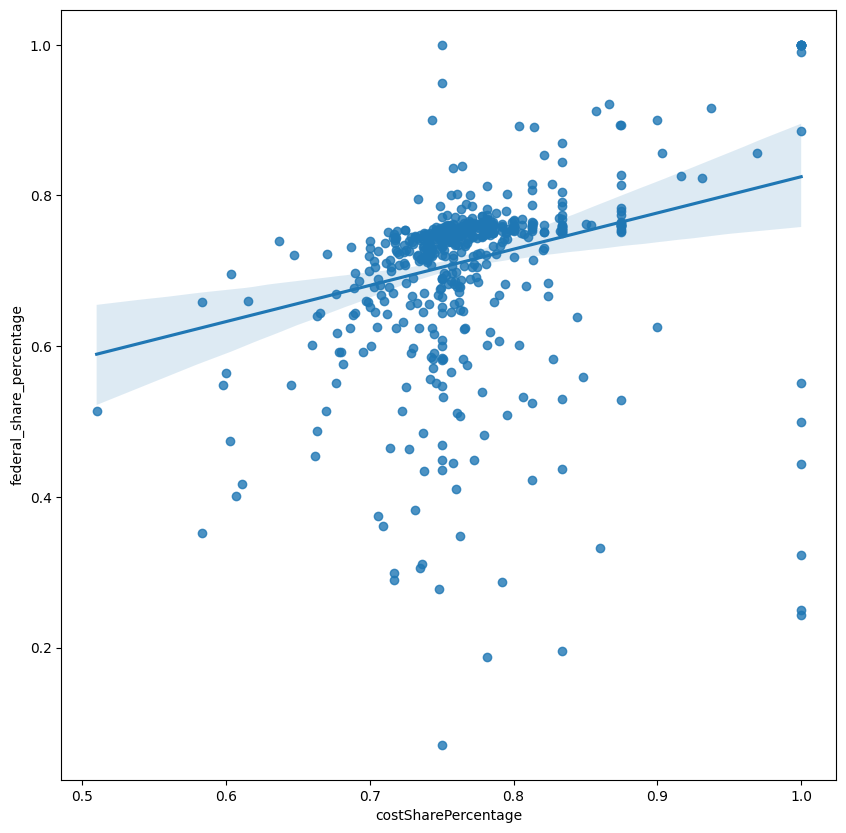

In [ ]:
from seaborn.regression import regplot
plt.figure(figsize=(10,10))

sns.regplot(data=state_project, x="costSharePercentage", y="federal_share_percentage")

## Why federal provide higher ratio?

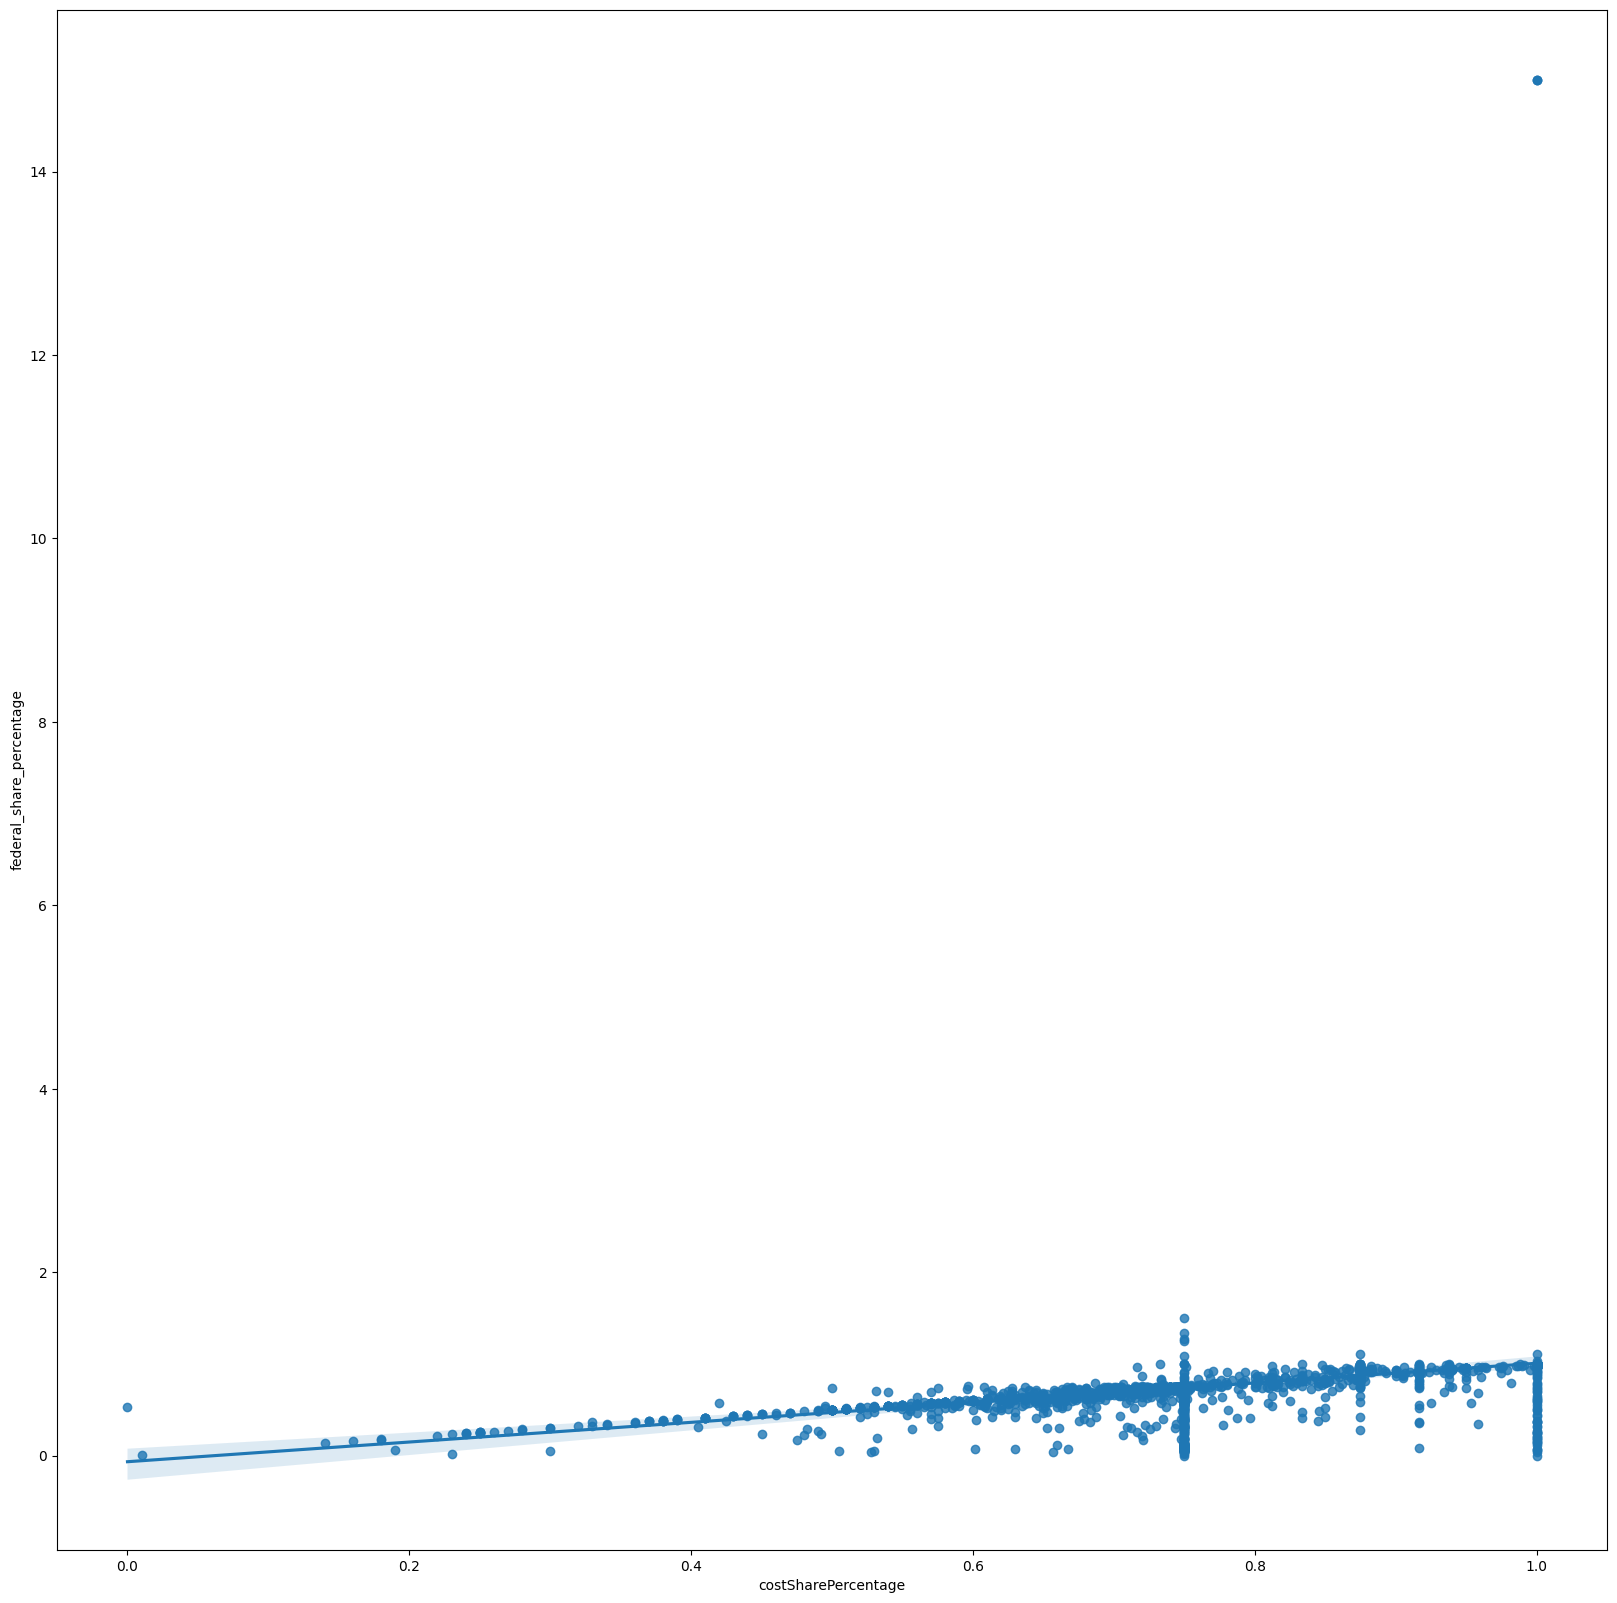

In [ ]:
plt.figure(figsize=(20,20))
sns.regplot(data=county_project, x="costSharePercentage", y="federal_share_percentage")

In [ ]:
county_higher_ratio = county_project[county_project.federal_share_percentage - county_project.costSharePercentage > 0.1]

In [ ]:
county_high_ratio_count = county_higher_ratio.groupby("state").size().reset_index(name="#count")
county_high_ratio_count

state  #count
0          Alabama       5
1      Connecticut       1
2         Delaware       1
3          Florida       3
4          Georgia       1
5         Illinois       1
6         Kentucky       1
7        Louisiana       5
8         Maryland       1
9    Massachusetts       3
10     Mississippi       3
11         Montana       1
12      New Jersey       6
13      New Mexico       1
14        New York       4
15    North Dakota       1
16        Oklahoma       6
17    Rhode Island       3
18  South Carolina       1
19       Tennessee       1
20           Texas       2
21        Virginia       1

In [ ]:
display(state_project.shape)
display(state_project.federalShareObligated.describe())


(667, 14)

count    6.670000e+02
mean     1.627779e+07
std      9.328102e+07
min      9.299100e+02
25%      5.946654e+05
50%      2.067959e+06
75%      6.554694e+06
max      1.745010e+09
Name: federalShareObligated, dtype: float64

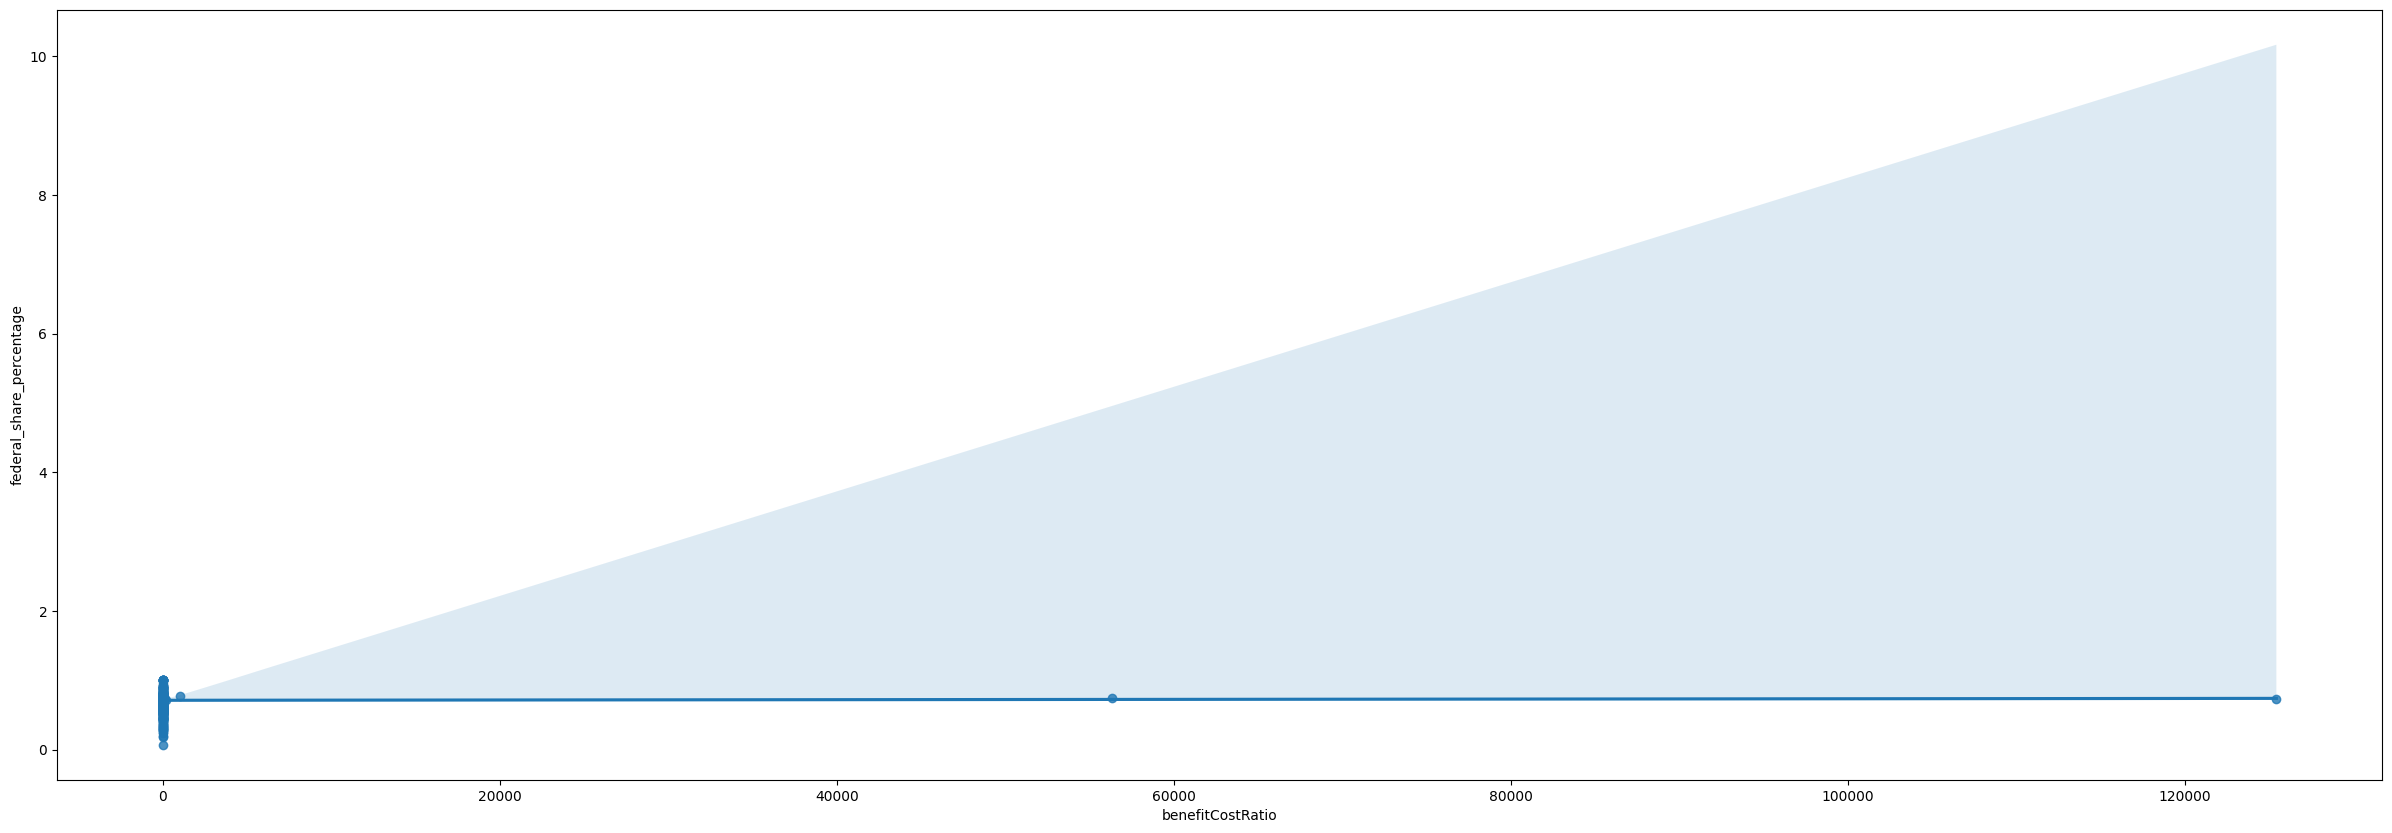

In [ ]:
plt.figure(figsize=(30,10))
sns.regplot(data=state_project, x="benefitCostRatio", y="federal_share_percentage")

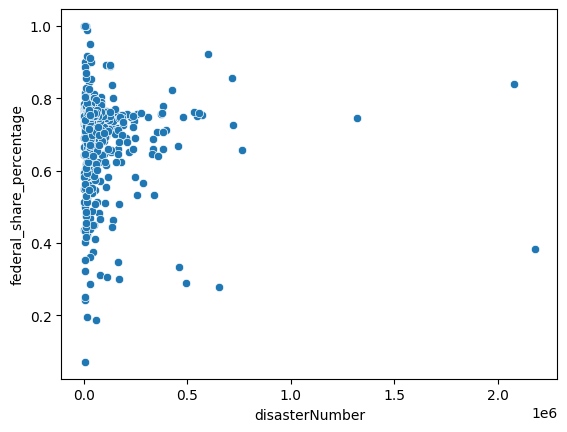

In [ ]:
sns.scatterplot(data=state_project, x="disasterNumber", y="federal_share_percentage")

In [ ]:
state_project.benefitCostRatio.describe()

count       667.000000
mean        276.601886
std        5320.554006
min           0.000000
25%           0.523083
50%           1.113523
75%           2.107600
max      125413.836050
Name: benefitCostRatio, dtype: float64

Texas, Brazoria in 2006 has the highest incredible benefit cost ratio 1.2*10^6

In [ ]:
state_project[state_project.benefitCostRatio>90000]
county_project[(county_project.state=='Texas') & (county_project.benefitCostRatio>90000)]

stateNumberCode  countyCode  state    county  programFy  countyPop  \
6501               48          39  Texas  Brazoria       2005     267879   
6502               48          39  Texas  Brazoria       2006     274045   

      count  costSharePercentage  projectAmount  federalShareObligated  \
6501      4                 0.75       735805.0               551854.0   
6502      9                 0.75        63341.0                47506.0   

      disasterNumber  benefitCostRatio  netValueBenefits  \
6501          3212.0       1239535.417      8.984487e+10   
6502          4872.0        826356.540      8.984396e+10   

      proposed_amount_per_person  federal_share_per_person  \
6501                    2.746781                  2.060087   
6502                    0.231134                  0.173351   

      federal_share_percentage  
6501                  0.750000  
6502                  0.750004

In [ ]:
state_project['proposed_amount_per_person'].describe()

count    667.000000
mean       4.086305
std       21.030743
min        0.000202
25%        0.249262
50%        0.695408
75%        2.169867
max      453.655471
Name: proposed_amount_per_person, dtype: float64

In [ ]:
state_project['federal_share_per_person'].describe()

count    667.000000
mean       2.935593
std       17.239540
min        0.000202
25%        0.177400
50%        0.486417
75%        1.498063
max      388.701930
Name: federal_share_per_person, dtype: float64

## Hazard risk dataset

In [ ]:
HazardInfo = pd.read_csv('Datasets/NRI_HazardInfo.csv')
display(HazardInfo)
display(HazardInfo.dtypes)



OID_             Hazard Prefix           Service      Start    End_  \
0      1          Avalanche   AVLN         Avalanche       1960  2019.0   
1      2   Coastal Flooding   CFLD   CoastalFlooding        NaN     NaN   
2      3          Cold Wave   CWAV          ColdWave       2005  2017.0   
3      4            Drought   DRGT           Drought       2000  2017.0   
4      5         Earthquake   ERQK        Earthquake       2017  2017.0   
5      6               Hail   HAIL              Hail       1986  2017.0   
6      7          Heat Wave   HWAV          HeatWave       2005  2017.0   
7      8          Hurricane   HRCN         Hurricane  1851/1949  2017.0   
8      9          Ice Storm   ISTM          IceStorm       1946  2014.0   
9     10          Landslide   LNDS         Landslide       2010  2019.0   
10    11          Lightning   LTNG         Lightning       1991  2012.0   
11    12  Riverine Flooding   RFLD  RiverineFlooding       1996  2019.0   
12    13        Strong Wind   SWND        StrongWind       1986  2017.0   
13    14            Tornado   TRND           Tornado       1986  2019.0   
14    15            Tsunami   TSUN           Tsunami       1800  2018.0   
15    16  Volcanic Activity   VLCN  VolcanicActivity     9310BC  2018.0   
16    17           Wildfire   WFIR          Wildfire       2016  2016.0   
17    18     Winter Weather   WNTW     WinterWeather       2005  2017.0   

   TotalYears        FrequencyModel  EAL_Building  EAL_Population  \
0          60  Annualized Frequency             1               1   
1         NaN  Annualized Frequency             1               1   
2          12  Annualized Frequency             1               1   
3          18  Annualized Frequency             0               0   
4           1           Probability             1               1   
5          32  Annualized Frequency             1               1   
6          12  Annualized Frequency             1               1   
7      167/69  Annualized Frequency             1               1   
8          67  Annualized Frequency             1               1   
9          10  Annualized Frequency             1               1   
10         22  Annualized Frequency             1               1   
11         24  Annualized Frequency             1               1   
12         32  Annualized Frequency             1               1   
13         34  Annualized Frequency             1               1   
14        219  Annualized Frequency             1               1   
15      11328  Annualized Frequency             1               1   
16          1           Probability             1               1   
17         12  Annualized Frequency             1               1   

    EAL_Agriculture                                     PeriodOfRecord  \
0                 0                               1960-2019 (60 years)   
1                 0                        Various (see documentation)   
2                 1                               2005-2017 (12 years)   
3                 1                               2000-2017 (18 years)   
4                 0                                       2017 dataset   
5                 1                               1986-2017 (32 years)   
6                 1                               2005-2017 (12 years)   
7                 1  East 1851-2017 (167 years) / West 1949-2017 (6...   
8                 0                               1946-2014 (67 years)   
9                 0                               2010-2019 (10 years)   
10                0                               1991-2012 (22 years)   
11                1                               1996-2019 (24 years)   
12                1                               1986-2017 (32 years)   
13                1                               1986-2019 (34 years)   
14                0                              1800-2018 (219 years)   
15                0                          9310BC-2018 (11328 years)   
16      

OID_                 int64
Hazard              object
Prefix              object
Service             object
Start               object
End_               float64
TotalYears          object
FrequencyModel      object
EAL_Building         int64
EAL_Population       int64
EAL_Agriculture      int64
PeriodOfRecord      object
NRI_VER             object
dtype: object

In [ ]:
hazardDic = pd.read_csv("Datasets/NRIDataDictionary.csv")
display(hazardDic.head(60))

Sort    Field Name                                        Field Alias  \
0      1      OBJECTID                                           OBJECTID   
1      2         Shape                                              Shape   
2      3  Shape_Length                                       Shape_Length   
3      4    Shape_Area                                         Shape_Area   
4      5         STATE                                         State Name   
5      6    STATEABBRV                            State Name Abbreviation   
6      7     STATEFIPS                                    State FIPS Code   
7      8        COUNTY                                        County Name   
8      9    COUNTYTYPE                                        County Type   
9     10    COUNTYFIPS                                   County FIPS Code   
10    11      STCOFIPS                             State-County FIPS Code   
11    12         TRACT                                       Census Tract   
12    13     TRACTFIPS                             Census Tract FIPS Code   
13    14        NRI_ID                             National Risk Index ID   
14    15    POPULATION                                  Population (2016)   
15    16    BUILDVALUE                                 Building Value ($)   
16    17     AGRIVALUE                              Agriculture Value ($)   
17    18          AREA                                       Area (sq mi)   
18    19    RISK_SCORE            National Risk Index - Score - Composite   
19    20    RISK_RATNG           National Risk Index - Rating - Composite   
20    21    RISK_NPCTL  National Risk Index - National Percentile - Co...   
21    22    RISK_SPCTL  National Risk Index - State Percentile - Compo...   
22    23     EAL_SCORE           Expected Annual Loss - Score - Composite   
23    24     EAL_RATNG          Expected Annual Loss - Rating - Composite   
24    25     EAL_NPCTL  Expected Annual Loss - National Percentile - C...   
25    26     EAL_SPCTL  Expected Annual Loss - State Percentile - Comp...   
26    27      EAL_VALT           Expected Annual Loss - Total - Composite   
27    28      EAL_VALB  Expected Annual Loss - Building Value - Composite   
28    29      EAL_VALP      Expected Annual Loss - Population - Composite   
29    30     EAL_VALPE  Expected Annual Loss - Population Equivalence ...   
30    31      EAL_VALA  Expected Annual Loss - Agriculture Value - Com...   
31    32    SOVI_SCORE                       Social Vulnerability - Score   
32    33    SOVI_RATNG                      Social Vulnerability - Rating   
33    34    SOVI_NPCTL         Social Vulnerability - National Percentile   
34    35    SOVI_SPCTL            Social Vulnerability - State Percentile   
35    36    SOVI_VALUE                       Social Vulnerability - Value   
36    37    RESL_SCORE                       Community Resilience - Score   
37    38    RESL_RATNG                      Community Resilience - Rating   
38    39    RESL_NPCTL         Community Resilience - National Percentile   
39    40    RESL_SPCTL            Community Resilience - State Percentile   
40    41    RESL_VALUE                       Community Resilience - Value   
41    42    AVLN_EVNTS                       Avalanche - Number of Events   
42    43    AVLN_AFREQ                   Avalanche - Annualized Frequency   
43    44     AVLN_EXPB              Avalanche - Exposure - Building Value   
44    45     AVLN_EXPP                  Avalanche - Exposure - Population   
45    46    AVLN_EXPPE      Avalanche - Exposure - Population Equivalence   
46    47     AVLN_EXPT                       Avalanche - Exposure - Total   
47    48     AVLN_HLRB        Avalanche - Historic Loss Ratio - Buildings   
48    49     AVLN_HLRP       Avalanche - Historic Loss Ratio - Population   
49    50     AVLN_HLRR     Avalanche - Historic Loss Ratio - Total Rating   
50    51     AVLN_EALB  Avalanche - Expected Annual Loss - Building Value   


In [ ]:
HazardIndicesByCounty = pd.read_csv('Datasets/NRI_Table_Counties.csv')
Counter(HazardIndicesByCounty.RISK_RATNG)

Counter({'Relatively High': 129,
         'Relatively Low': 1215,
         'Relatively Moderate': 518,
         'Very High': 21,
         'Very Low': 1259})

In [ ]:
HazardIndicesByCounty = HazardIndicesByCounty.drop(columns="POPULATION")
hazard_county = HazardIndicesByCounty.iloc[:,2:35].copy()
hazard_county.rename(columns = {'STATEFIPS':'stateNumberCode', 'COUNTYFIPS':'countyCode', 'STATE':'state', 'COUNTY':'county'}, inplace = True)
county_project_risk = hazard_county.merge(county_project_avg, on=["stateNumberCode", "countyCode", "state", "county"])
county_project_risk

state STATEABBRV  stateNumberCode    county COUNTYTYPE  countyCode  \
0     Kentucky         KY               21   Johnson     County         115   
1     Kentucky         KY               21    Kenton     County         117   
2     Kentucky         KY               21      Knox     County         121   
3     Kentucky         KY               21     Larue     County         123   
4     Kentucky         KY               21    Laurel     County         125   
...        ...        ...              ...       ...        ...         ...   
2171   Wyoming         WY               56  Niobrara     County          27   
2172   Wyoming         WY               56  Sheridan     County          33   
2173   Wyoming         WY               56  Sublette     County          35   
2174   Wyoming         WY               56     Teton     County          39   
2175   Wyoming         WY               56    Weston     County          45   

      STCOFIPS    BUILDVALUE   AGRIVALUE         AREA  ...  count  \
0        21115  1.924008e+09    706000.0   261.958144  ...     15   
1        21117  1.877338e+10   5390000.0   160.213975  ...     34   
2        21121  2.135773e+09   2534000.0   386.298435  ...      1   
3        21123  1.221343e+09  41112000.0   261.539564  ...      9   
4        21125  4.901468e+09  15426000.0   433.957784  ...      3   
...        ...           ...         ...          ...  ...    ...   
2171     56027  3.215390e+08  49684000.0  2626.026683  ...      1   
2172     56033  4.084336e+09  59674000.0  2523.483119  ...      5   
2173     56035  1.489304e+09  47872000.0  4886.479555  ...      1   
2174     56039  3.476594e+09  17582000.0  3996.855337  ...      1   
2175     56045  7.744440e+08  34274000.0  2398.003888  ...      1   

     costSharePercentage  projectAmount  federalShareObligated  \
0                   0.75     3661455.01             2746056.81   
1                   0.75     3352193.00             2313010.68   
2                   0.75       35471.00               26603.00   
3                   0.75      184571.00              138421.00   
4                   0.75      893104.00              669826.00   
...                  ...            ...                    ...   
2171                0.75      454991.11              341243.34   
2172                0.75      531960.00              398970.81   
2173                0.75      311751.67              233813.75   
2174                0.75      120791.00               90593.00   
2175                0.75      111993.07               83994.80   

      disasterNumber benefitCostRatio  netValueBenefits  \
0            32824.0         1.261833         9089924.0   
1            25791.0         3.867825         9209051.0   
2             1407.0         0.000000               0.0   
3             5454.0         0.000000               0.0   
4            10187.0         0.489000         1133020.0   
...              ...              ...               ...   
2171          4227.0         1.000000          507840.0   
2172         12241.0         2.548500         1726250.0   
2173          5241.0         1.040000          660704.0   
2174          1351.0         1.119000          139210.0   
2175          4306.0         6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                      26.253848                 19.690142   
1                       5.245872                  3.630763   
2                       1.122642                  0.841974   
3                      13.558437                 10.168295   
4                       5.129208                  3.846895   
...                          ...                       ...   
2171                  182.874240                137.155683   
2172                    9.001844                  6.751397   
2173                   31.990936                 23.993202   
2174                    6.576523                  4.932379   
2175                   15.511506               

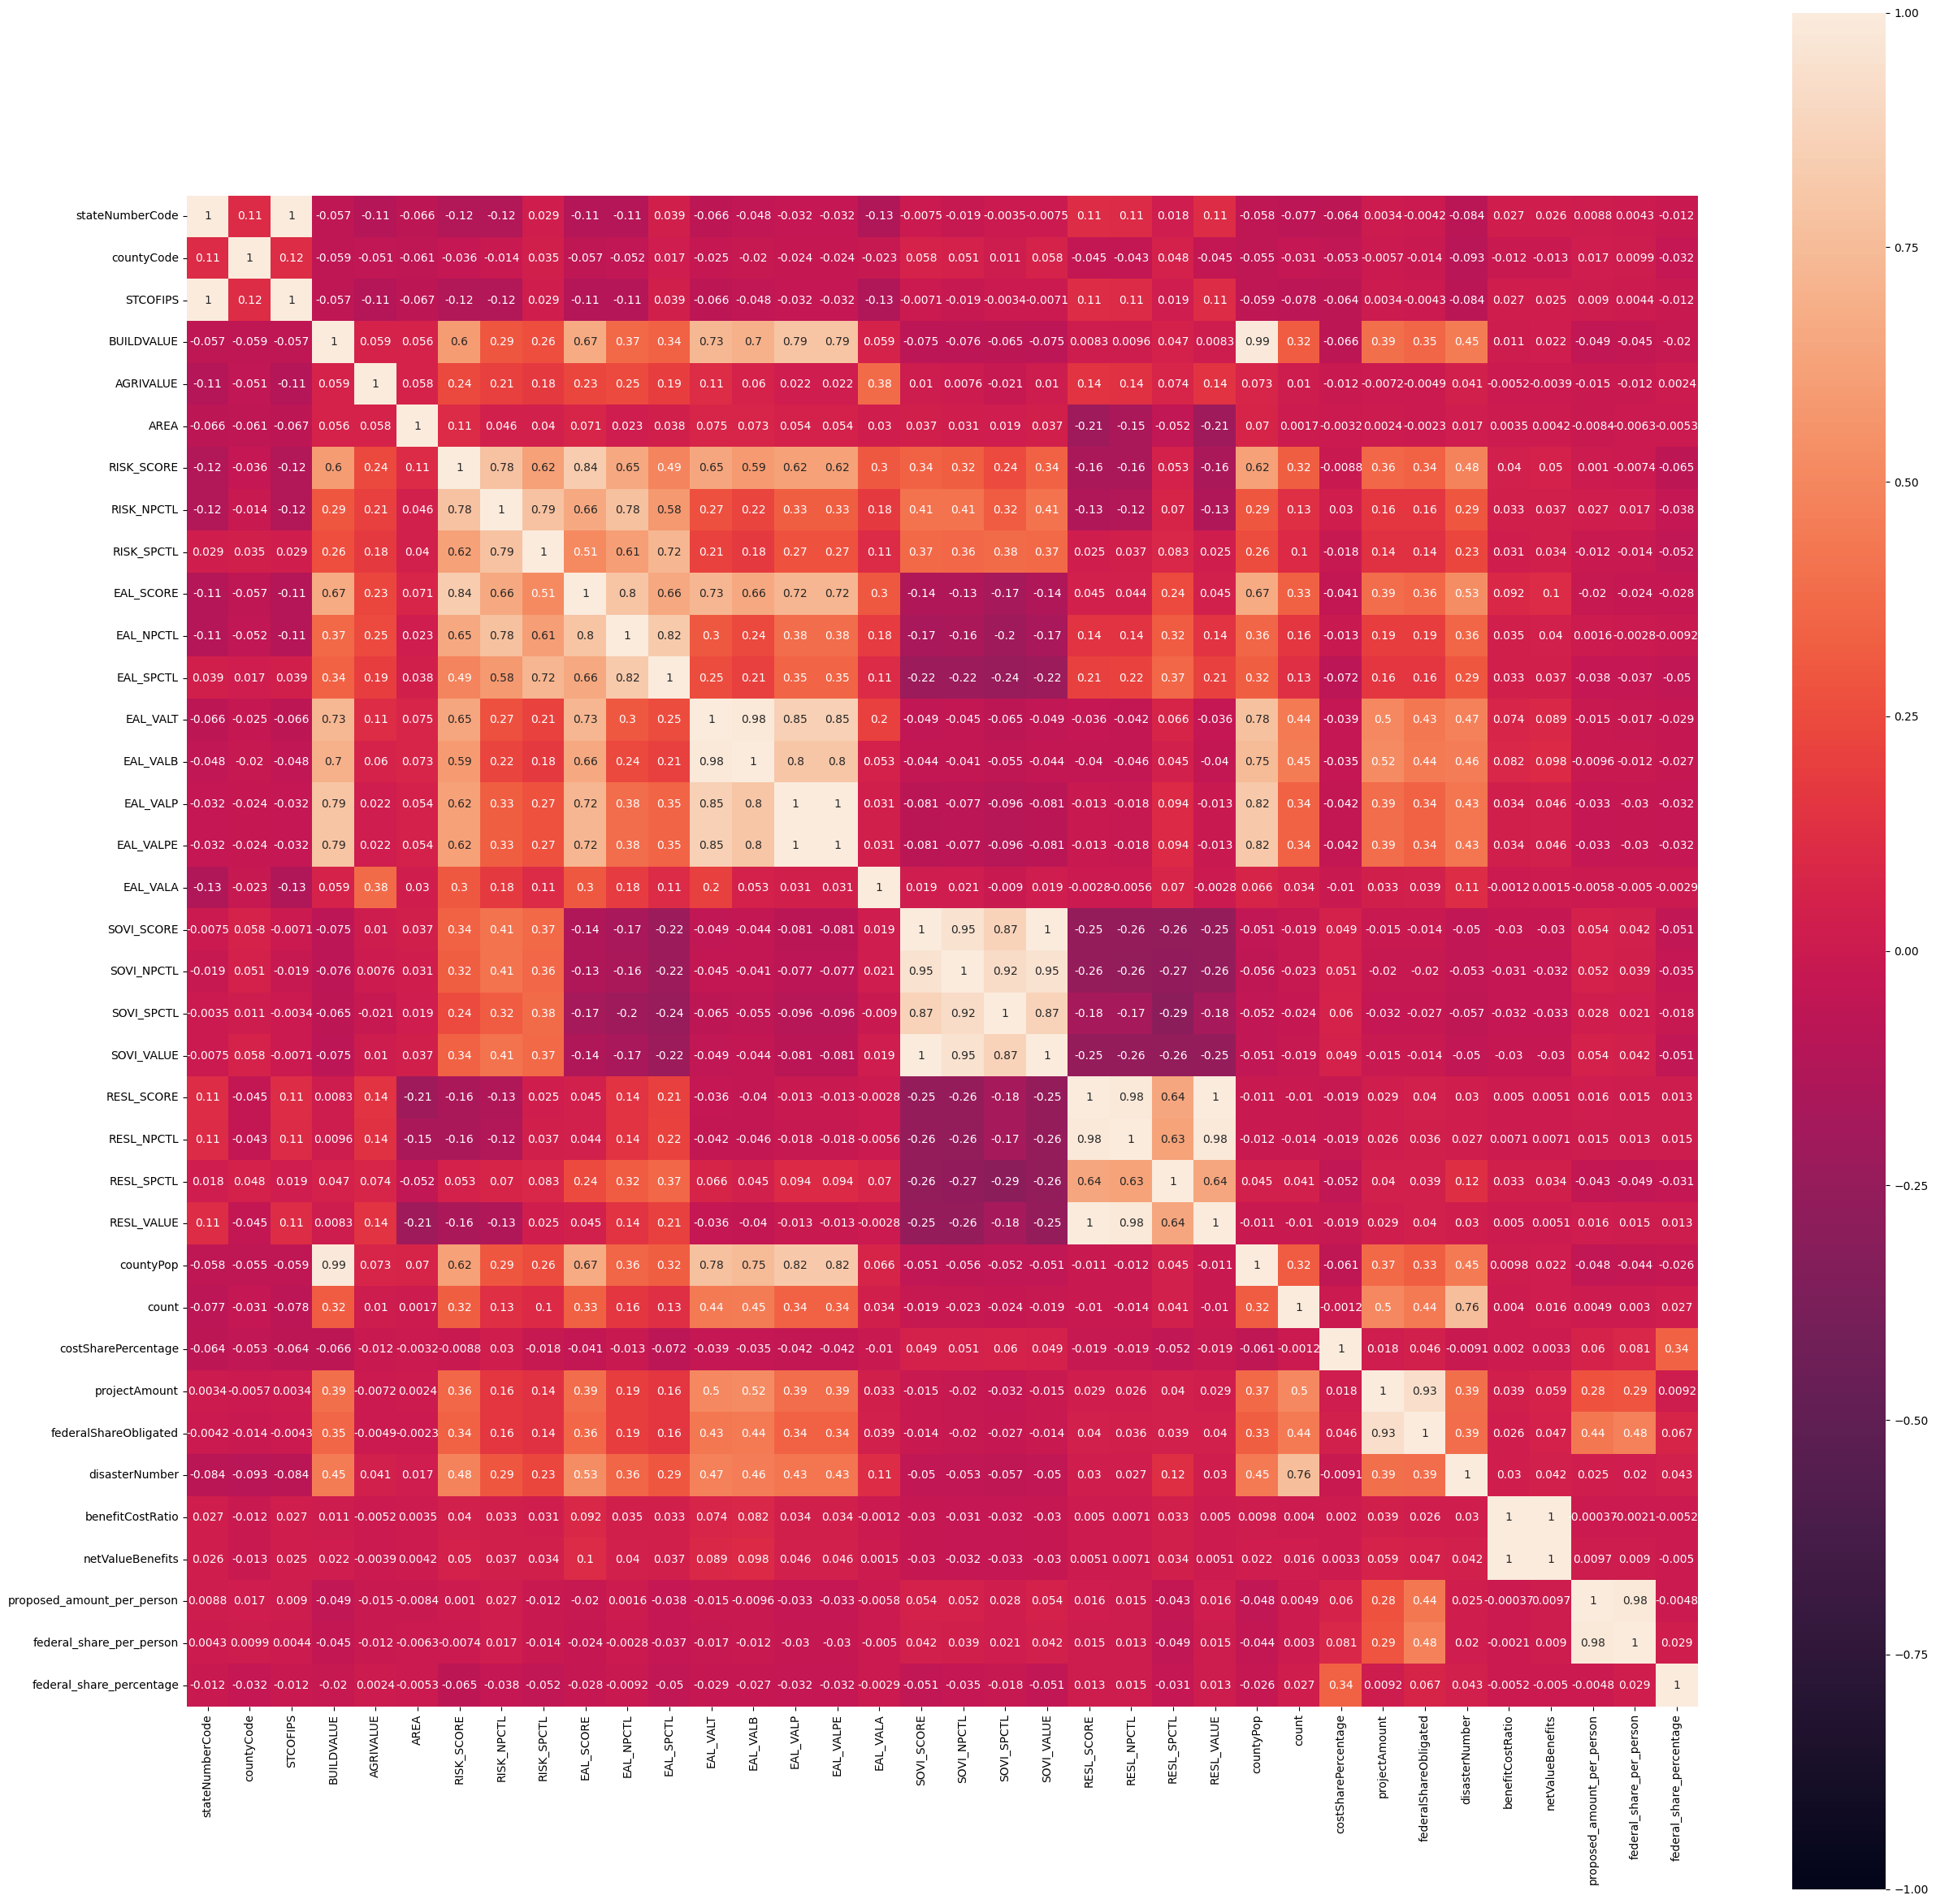

In [ ]:
corr = county_project_risk.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

In [ ]:
county_project_risk.RISK_RATNG.unique()

array(['Relatively Low', 'Very Low', 'Relatively Moderate',
       'Relatively High', 'Very High'], dtype=object)

## t test for high risk and low risk counties

In [ ]:
low_risk_county = county_project_risk[county_project_risk.RISK_RATNG == "Very Low"]
high_risk_county = county_project_risk[(county_project_risk.RISK_RATNG == "Very High") | (county_project_risk.RISK_RATNG == "Relatively High")]
display(low_risk_county.shape)
display(high_risk_county.shape)

(772, 44)

(124, 44)

In [427]:
one_hundred_high_risk = high_risk_county.sample(n=100)
one_hundred_low_risk = low_risk_county.sample(n=100)
one_hundred_high_risk.columns

Index(['state', 'STATEABBRV', 'stateNumberCode', 'county', 'COUNTYTYPE',
       'countyCode', 'STCOFIPS', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_SCORE', 'RISK_RATNG', 'RISK_NPCTL', 'RISK_SPCTL', 'EAL_SCORE',
       'EAL_RATNG', 'EAL_NPCTL', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB',
       'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'SOVI_SCORE', 'SOVI_RATNG',
       'SOVI_NPCTL', 'SOVI_SPCTL', 'SOVI_VALUE', 'RESL_SCORE', 'RESL_RATNG',
       'RESL_NPCTL', 'RESL_SPCTL', 'RESL_VALUE', 'countyPop', 'count',
       'costSharePercentage', 'projectAmount', 'federalShareObligated',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'proposed_amount_per_person', 'federal_share_per_person',
       'federal_share_percentage'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ttest_indResult(statistic=-1.1731254273803864, pvalue=0.24215484405361817)

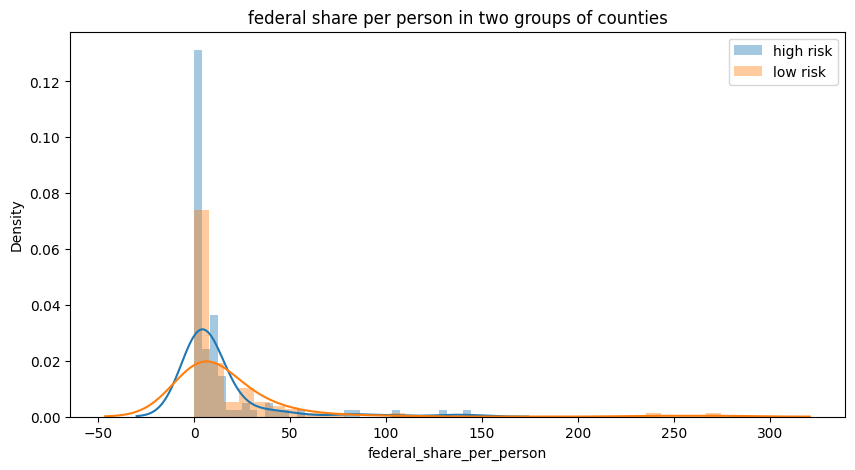

In [446]:
plt.figure(figsize=(10,5))
sns.distplot(one_hundred_high_risk.federal_share_per_person, label="high risk", hist=True, kde=True)
sns.distplot(one_hundred_low_risk.federal_share_per_person, label="low risk", hist=True, kde=True)
plt.title("federal share per person in two groups of counties")
plt.legend()

stats.ttest_ind(one_hundred_high_risk.federal_share_per_person, one_hundred_low_risk.federal_share_per_person)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ttest_indResult(statistic=-2.862553354104527, pvalue=0.004654519333428317)

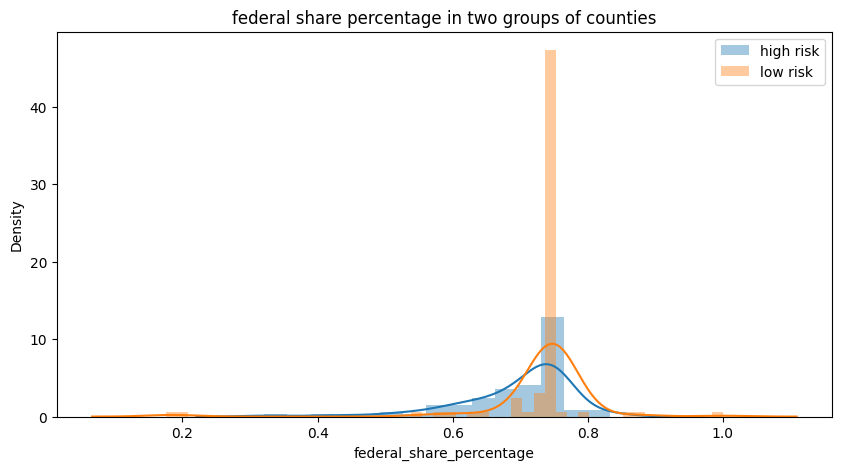

In [459]:
plt.figure(figsize=(10,5))
sns.distplot(one_hundred_high_risk.federal_share_percentage, label="high risk", hist=True, kde=True)
sns.distplot(one_hundred_low_risk.federal_share_percentage, label="low risk", hist=True, kde=True)
plt.title("federal share percentage in two groups of counties")
plt.legend()

stats.ttest_ind(one_hundred_high_risk.federal_share_percentage, one_hundred_low_risk.federal_share_percentage)

In [ ]:
state_hazard = pd.read_csv("Datasets/NRI_Table_States.csv")
state_hazard

OID_ NRI_ID                 STATE STATEABBRV  STATEFIPS  POPULATION  \
0      1    S01               Alabama         AL          1     4779736   
1      2    S02                Alaska         AK          2      710231   
2      3    S04               Arizona         AZ          4     6392017   
3      4    S05              Arkansas         AR          5     2915918   
4      5    S06            California         CA          6    37253956   
5      6    S08              Colorado         CO          8     5029196   
6      7    S09           Connecticut         CT          9     3574097   
7      8    S10              Delaware         DE         10      897934   
8      9    S11  District of Columbia         DC         11      601723   
9     10    S12               Florida         FL         12    18801310   
10    11    S13               Georgia         GA         13     9687653   
11    12    S15                Hawaii         HI         15     1360301   
12    13    S16                 Idaho         ID         16     1567582   
13    14    S17              Illinois         IL         17    12830632   
14    15    S18               Indiana         IN         18     6483802   
15    16    S19                  Iowa         IA         19     3046355   
16    17    S20                Kansas         KS         20     2853118   
17    18    S21              Kentucky         KY         21     4339367   
18    19    S22             Louisiana         LA         22     4533372   
19    20    S23                 Maine         ME         23     1328361   
20    21    S24              Maryland         MD         24     5773552   
21    22    S25         Massachusetts         MA         25     6547629   
22    23    S26              Michigan         MI         26     9883640   
23    24    S27             Minnesota         MN         27     5303925   
24    25    S28           Mississippi         MS         28     2967297   
25    26    S29              Missouri         MO         29     5988927   
26    27    S30               Montana         MT         30      989415   
27    28    S31              Nebraska         NE         31     1826341   
28    29    S32                Nevada         NV         32     2700551   
29    30    S33         New Hampshire         NH         33     1316470   
30    31    S34            New Jersey         NJ         34     8791894   
31    32    S35            New Mexico         NM         35     2059179   
32    33    S36              New York         NY         36    19378102   
33    34    S37        North Carolina         NC         37     9535483   
34    35    S38          North Dakota         ND         38      672591   
35    36    S39                  Ohio         OH         39    11536504   
36    37    S40              Oklahoma         OK         40     3751351   
37    38    S41                Oregon         OR         41     3831074   
38    39    S42          Pennsylvania         PA         42    12702379   
39    40    S44          Rhode Island         RI         44     1052567   
40    41    S45        South Carolina         SC         45     4625364   
41    42    S46          South Dakota         SD         46      814180   
42    43    S47             Tennessee         TN         47     6346105   
43    44    S48                 Texas         TX         48    25145561   
44    45    S49                  Utah         UT         49     2763885   
45    46    S50               Vermont         VT         50      625741   
46    47    S51              Virginia         VA         51     8001024   
47    48    S53            Washington         WA         53     6724540   
48    49    S54         West Virginia         WV         54     1852994   
49    50    S55             Wisconsin         WI         55     5686986   
50    51    S56               Wyoming         WY         56      563626   

      BUILDVALUE     AGRIVALUE           AREA   EAL_SCORE  ...     WNTW_EXPA  \
0   5.026065e+11  5.880

In [ ]:
hazardScore = state_hazard.iloc[:,[4, 6, 7, 8, 9]].copy()
hazardScore.rename(columns = {'STATEFIPS':'stateNumberCode'}, inplace = True)
state_project_loss = hazardScore.merge(state_project_avg, on=["stateNumberCode"])
state_project_loss

stateNumberCode    BUILDVALUE     AGRIVALUE           AREA   EAL_SCORE  \
0                 1  5.026065e+11  5.880985e+09   50646.710241   34.608908   
1                 2  9.066546e+10  7.045900e+07  570885.873384   16.044408   
2                 4  6.314331e+11  2.548788e+09  113590.691628   25.714888   
3                 5  2.909845e+11  9.434198e+09   52034.233206   33.859489   
4                 6  3.848852e+12  2.885307e+10  155785.663611  100.000000   
5                 8  5.765004e+11  7.489216e+09  103639.801774   32.676690   
6                 9  4.882425e+11  5.801130e+08    4842.730398    8.604415   
7                10  1.214668e+11  1.465973e+09    1948.749875    4.572907   
8                11  9.416670e+10  0.000000e+00      61.139885    0.614673   
9                12  2.219664e+12  7.355867e+09   53633.983728   57.272742   
10               13  1.074502e+12  9.482694e+09   57597.740485   36.858424   
11               15  1.507937e+11  5.638030e+08    6422.466128   17.897500   
12               16  1.516199e+11  7.567442e+09   82644.422957   17.085092   
13               17  1.623142e+12  1.672236e+10   55515.334097   42.461740   
14               18  7.621680e+11  1.110734e+10   35825.541717   31.841498   
15               19  3.849535e+11  2.895645e+10   55855.120784   36.821397   
16               20  3.350606e+11  1.848575e+10   81758.318563   35.409937   
17               21  4.666170e+11  5.737925e+09   39485.142970   32.657054   
18               22  4.582162e+11  3.172981e+09   43206.668295   48.134266   
19               23  1.626733e+11  5.771090e+08   30844.070403    8.009059   
20               24  7.829065e+11  2.472806e+09    9710.734083   21.693277   
21               25  8.862250e+11  4.616940e+08    7800.915827   15.438873   
22               26  1.251426e+12  8.220934e+09   56559.333776   28.359947   
23               27  7.129711e+11  1.839539e+10   79625.497352   33.412303   
24               28  2.805185e+11  5.762130e+09   46923.075137   36.048178   
25               29  7.095642e+11  1.037479e+10   68746.247592   42.907644   
26               30  1.080463e+11  3.520624e+09  145545.349775   12.083001   
27               31  2.154281e+11  2.194526e+10   76818.068485   31.223741   
28               32  2.872489e+11  6.623660e+08  109780.121839   27.621223   
29               33  1.686871e+11  1.877950e+08    8952.719064    6.040878   
30               34  1.137709e+12  1.094579e+09    7355.136271   42.489384   
31               35  1.839210e+11  2.577123e+09  121309.933932   18.248144   
32               36  2.335042e+12  5.357385e+09   47123.360197   32.738856   
33               37  1.045401e+12  1.254440e+10   48617.852910   46.135840   
34               38  7.881308e+10  8.234101e+09   69000.451886   16.559629   
35               39  1.434964e+12  9.341233e+09   40862.442001   31.400740   
36               40  4.031740e+11  7.465507e+09   68596.599475   37.104862   
37               41  4.096201e+11  4.963060e+09   95986.628562   35.908443   
38               42  1.470727e+12  7.758879e+09   44742.070179   30.165573   
39               44  1.337965e+11  5.800000e+07    1033.980206    0.151235   
40               45  4.889510e+11  2.992734e+09   30062.956351   31.600940   
41               46  8.964568e+10  9.721522e+09   75809.285558   21.694943   
42               47  6.853868e+11  3.698127e+09   41234.927486   40.995986   
43               48  2.597201e+12  2.446349e+10  261252.802529   85.965615   
44               49  2.499685e+11  1.838610e+09   82195.264942   25.446030   
45               50  8.134404e+10  7.809700e+08    9217.589715    2.692563   
46               51  1.010543e+12  3.821150e+09   39480.566622   26.478262   
47               53  7.413408e+11  9.104311e+09   66452.710267   45.902110   
48               54  1.958574e+11  7.542730e+08   24040.896848   13.156865   
49               55  7.435392e+11  1.129026e+10   54160.637232   24.048003   
50               56  6.170

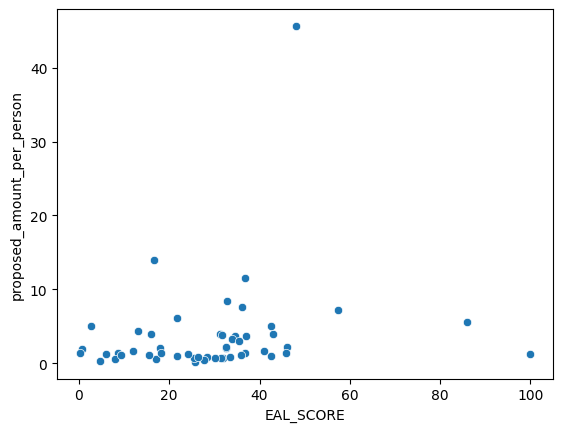

In [ ]:
sns.scatterplot(data=state_project_loss, x="EAL_SCORE", y="proposed_amount_per_person")

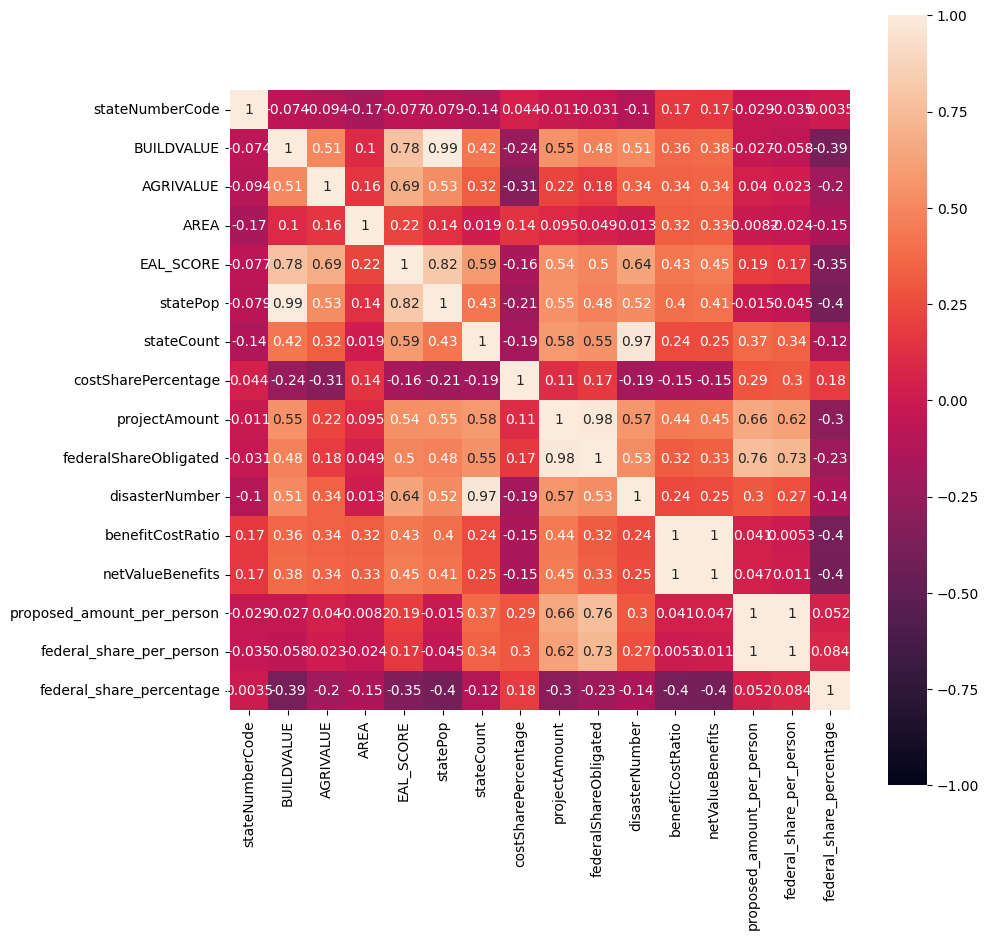

In [ ]:
corr = state_project_loss.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)
# high positive corr
# EAL_SCORE vs statePop / build value, proposed_amount per person vs federal share per person, statePop vs build value, 

[Text(0.5, 1.0, 'project amount vs. federal share obligated')]

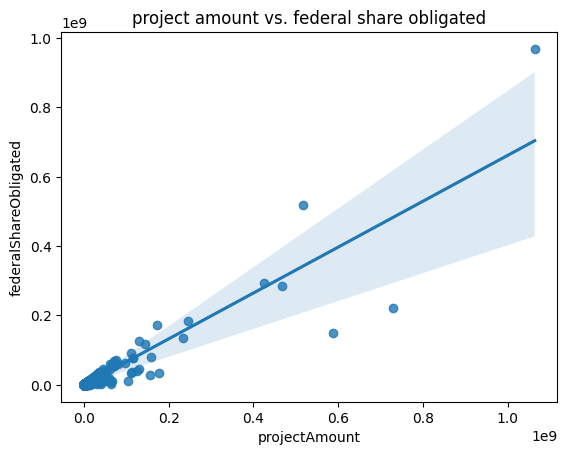

In [ ]:
sns.regplot(data=county_project, x="projectAmount", y="federalShareObligated").set(title="project amount vs. federal share obligated")

[Text(0.5, 1.0, 'proposed amount per person vs. federal share per person')]

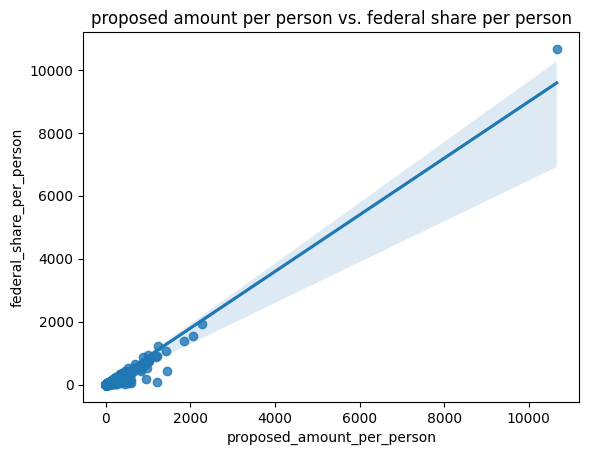

In [ ]:
sns.regplot(data=county_project, x="proposed_amount_per_person", y="federal_share_per_person").set(title="proposed amount per person vs. federal share per person")

In [ ]:
county_project[county_project.proposed_amount_per_person>10000]

stateNumberCode  countyCode     state  county  programFy  countyPop  \
4587               36          39  New York  Greene       2013      48587   

      count  costSharePercentage  projectAmount  federalShareObligated  \
4587      4                0.875    518155133.0            518123545.0   

      disasterNumber  benefitCostRatio  netValueBenefits  \
4587          8170.0            2.1925      2.313779e+09   

      proposed_amount_per_person  federal_share_per_person  \
4587                 10664.48089              10663.830757   

      federal_share_percentage  
4587                  0.999939

[Text(0.5, 1.0, 'proposed cost share percentage vs. federal share percentage')]

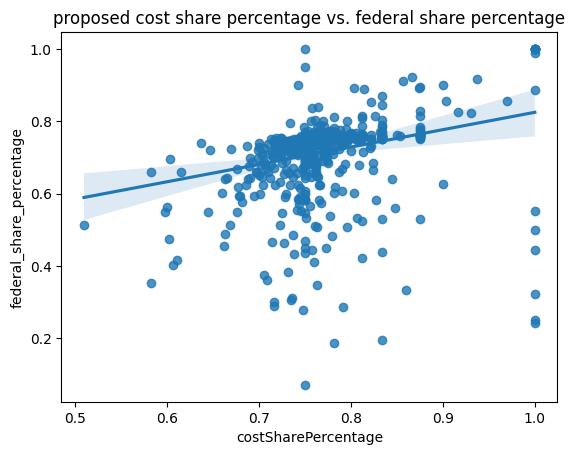

In [ ]:
sns.regplot(data=state_project, x="costSharePercentage", y="federal_share_percentage").set(title="proposed cost share percentage vs. federal share percentage")

# The weight of different hazards for national risk index score

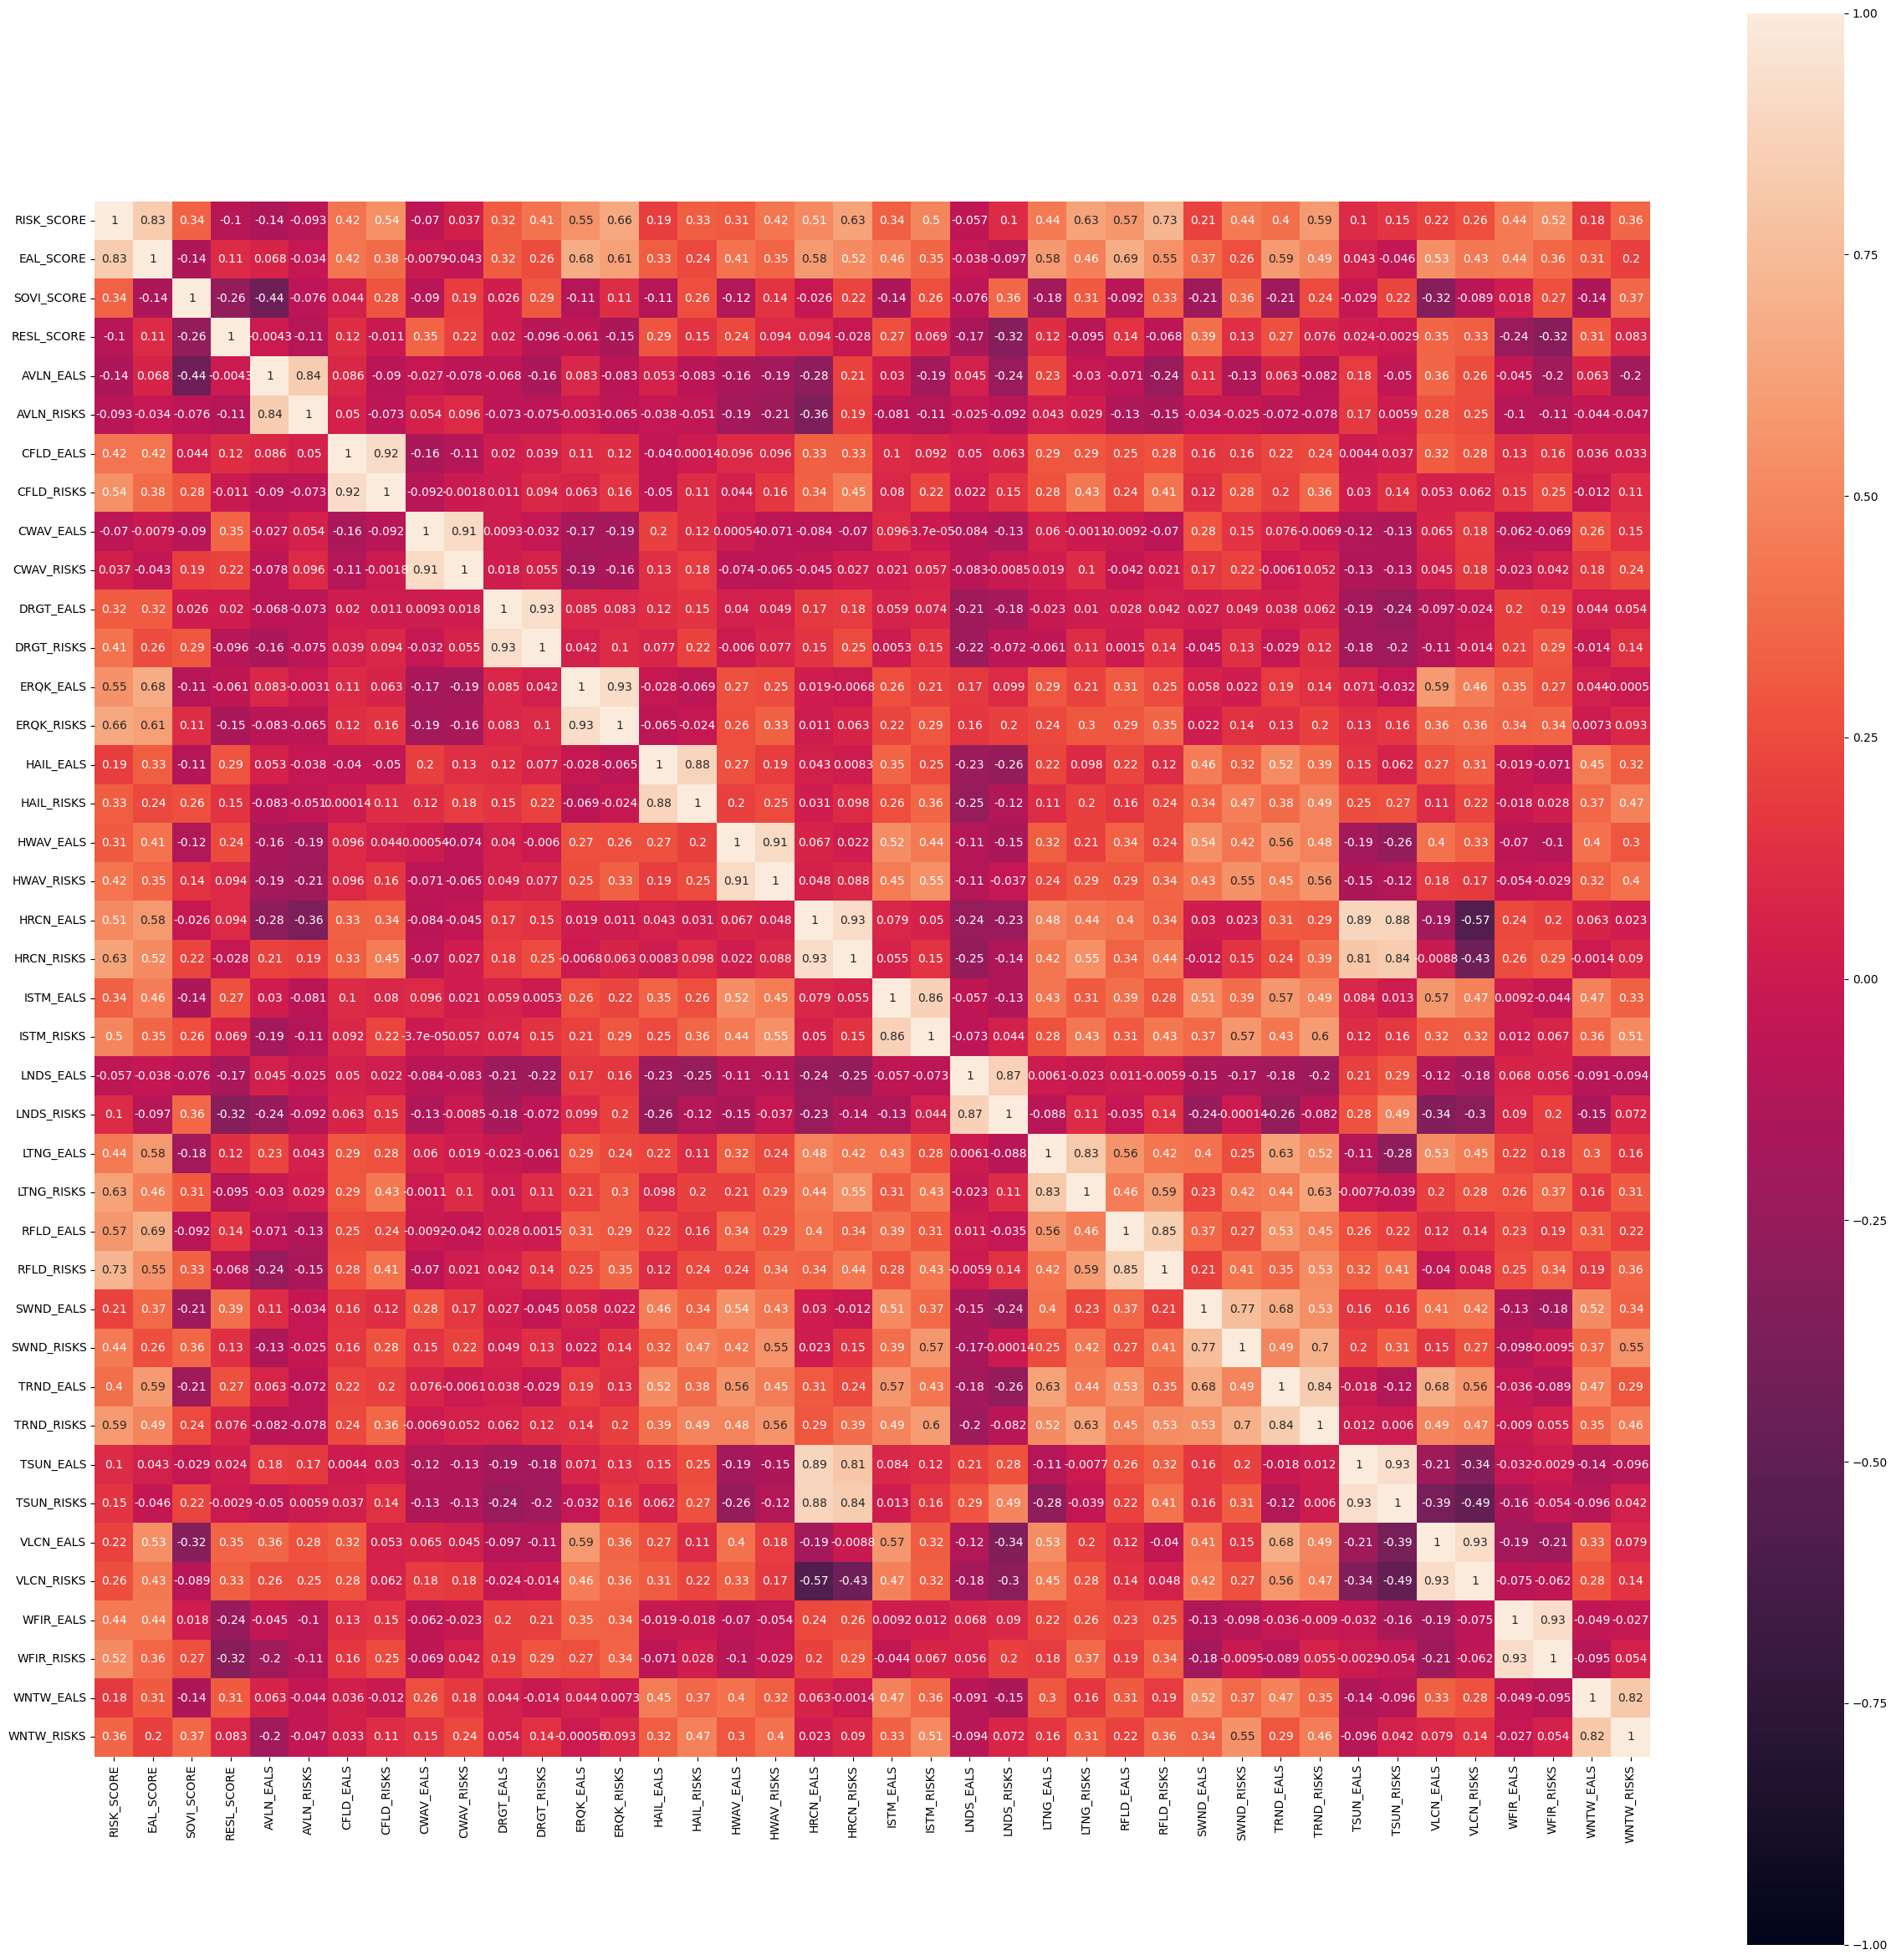

In [ ]:
from numpy.ma.core import append
hazard_columns = HazardIndicesByCounty.columns
scores = []
# targets are any scores
for column in hazard_columns:
  if "SCORE" in column or "RISKS" in column or "EALS" in column:
    scores.append(column)

hazard_scores = HazardIndicesByCounty[scores]
score_corr = hazard_scores.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(score_corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

national risk index score replys on the estimated annual losss score. It's not heavily depends on a single hazard risk core and not evenly. But for each hazard risk score, it depends on the hazard annual loss score.

# income, median household from wiki

In [ ]:
from bs4 import BeautifulSoup
import requests

html = requests.get('https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income')

soup = BeautifulSoup(html.text, 'html5lib')

In [ ]:
tables = soup('table', {'class': 'wikitable sortable'})
# this is the table we need
income_table = tables[0]
# forget the column titles
income_rows = income_table('tr')[1:]
rank_column=[]
county_column=[]
state_column=[]
per_capita_income_column=[]
median_household_income_column=[]
median_family_income_column=[]
num_household_column=[]
# some rows that represents nothing in rank means state level; missing value in county or state means thats row for percentage
for row in income_rows:
  if( row('td')[0].text!="\n" and "—" not in row('td')[0].text and "%" not in row('td')[0].text):
    rank_column.append(row('td')[0].text.strip("\n"))
    county_column.append(row('td')[1].text.replace(" County", "").replace(" City", "").strip("\n"))
    state_column.append(row('td')[2].text.strip("\n"))
    per_capita_income_column.append(row('td')[3].text.replace("$", "").replace(",","").strip("\n"))
    median_household_income_column.append(row('td')[4].text.replace("$", "").replace(",","").strip("\n"))
    median_family_income_column.append(row('td')[5].text.replace("$", "").replace(",","").strip("\n"))
    num_household_column.append(row('td')[6].text.replace(",","").strip("\n"))



In [ ]:
income = pd.DataFrame({'rank':rank_column, 'county':county_column, 'state':state_column, 'per capita income':per_capita_income_column, 'median household income': median_household_income_column, 'median family income': median_family_income_column, 'number of household': num_household_column})
income = income.astype({'rank':'int','per capita income':'float', 'median household income':'float', 'median family income':'float', 'number of household':'float'})
income.describe()

rank  per capita income  median household income  \
count  3143.000000        3143.000000              3143.000000   
mean   1572.000000       23634.050589             45946.741648   
std     907.450274        5655.299026             11975.080836   
min       1.000000        8768.000000             19986.000000   
25%     786.500000       19910.000000             38184.500000   
50%    1572.000000       22906.000000             44156.000000   
75%    2357.500000       26247.500000             51171.000000   
max    3143.000000       76592.000000            124055.000000   

       median family income  number of household  
count           3143.000000         3.143000e+03  
mean           56674.479478         9.916507e+04  
std            13731.046446         3.167330e+05  
min            25304.000000         7.100000e+01  
25%            47595.000000         1.105400e+04  
50%            54936.000000         2.581500e+04  
75%            63149.000000         6.708650e+04  
max           152857.000000         9.893481e+06

In [ ]:
county_project_avg

stateNumberCode  countyCode    state     county     countyPop  count  \
0                   1           0  Alabama  Statewide  4.706828e+06     99   
1                   1           1  Alabama    Autauga  4.914500e+04     36   
2                   1           3  Alabama    Baldwin  1.793134e+05    673   
3                   1           5  Alabama    Barbour  2.959700e+04      2   
4                   1           7  Alabama       Bibb  2.170500e+04     46   
...               ...         ...      ...        ...           ...    ...   
2532               56          27  Wyoming   Niobrara  2.488000e+03      1   
2533               56          33  Wyoming   Sheridan  2.950000e+04      5   
2534               56          35  Wyoming   Sublette  9.745000e+03      1   
2535               56          39  Wyoming      Teton  1.836700e+04      1   
2536               56          45  Wyoming     Weston  7.220000e+03      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.886964    18167898.17            15219667.32   
1                0.699074     1718574.00             1224887.00   
2                0.741669    28518186.00            24040371.25   
3                0.830000       21338.00               18845.00   
4                0.735000     2931436.47             2146000.13   
...                   ...            ...                    ...   
2532             0.750000      454991.11              341243.34   
2533             0.750000      531960.00              398970.81   
2534             0.750000      311751.67              233813.75   
2535             0.750000      120791.00               90593.00   
2536             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            94212.0          0.000000               0.0   
1            29971.0          2.788352        19096405.0   
2           116299.0          4.959370       293109375.0   
3             3394.0          1.089000          165806.0   
4            18078.0          4.365889        14733224.0   
...              ...               ...               ...   
2532          4227.0          1.000000          507840.0   
2533         12241.0          2.548500         1726250.0   
2534          5241.0          1.040000          660704.0   
2535          1351.0          1.119000          139210.0   
2536          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.279652                  0.233568   
1                       3.886101                  2.769485   
2                      19.429245                 16.506251   
3                       0.361297                  0.319227   
4                      45.505311                 33.360198   
...                          ...                       ...   
2532                  182.874240                137.155683   
2533                    9.001844                  6.751397   
2534                   31.990936                 23.993202   
2535                    6.576523                  4.932379   
2536                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.878059  
1                     0.700984  
2                     0.748560  
3                     0.830672  
4                     0.722741  
...                        ...  
2532                  0.750000  
2533                  0.750002  
2534                  0.750000  
2535                  0.749998  
2536                  0.750000  

[2537 rows x 15 columns]

In [ ]:
county_project_income = county_project_avg.merge(income, on=["state", "county"])
county_project_income

stateNumberCode  countyCode    state    county      countyPop  count  \
0                   1           1  Alabama   Autauga   49145.000000     36   
1                   1           3  Alabama   Baldwin  179313.444444    673   
2                   1           5  Alabama   Barbour   29597.000000      2   
3                   1           7  Alabama      Bibb   21705.000000     46   
4                   1          11  Alabama   Bullock   10930.500000      2   
...               ...         ...      ...       ...            ...    ...   
2178               56          27  Wyoming  Niobrara    2488.000000      1   
2179               56          33  Wyoming  Sheridan   29500.000000      5   
2180               56          35  Wyoming  Sublette    9745.000000      1   
2181               56          39  Wyoming     Teton   18367.000000      1   
2182               56          45  Wyoming    Weston    7220.000000      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.699074     1718574.00             1224887.00   
1                0.741669    28518186.00            24040371.25   
2                0.830000       21338.00               18845.00   
3                0.735000     2931436.47             2146000.13   
4                0.690000       38634.00               26726.00   
...                   ...            ...                    ...   
2178             0.750000      454991.11              341243.34   
2179             0.750000      531960.00              398970.81   
2180             0.750000      311751.67              233813.75   
2181             0.750000      120791.00               90593.00   
2182             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            29971.0          2.788352        19096405.0   
1           116299.0          4.959370       293109375.0   
2             3394.0          1.089000          165806.0   
3            18078.0          4.365889        14733224.0   
4             3837.0          0.685500           21420.0   
...              ...               ...               ...   
2178          4227.0          1.000000          507840.0   
2179         12241.0          2.548500         1726250.0   
2180          5241.0          1.040000          660704.0   
2181          1351.0          1.119000          139210.0   
2182          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       3.886101                  2.769485   
1                      19.429245                 16.506251   
2                       0.361297                  0.319227   
3                      45.505311                 33.360198   
4                       1.767156                  1.221951   
...                          ...                       ...   
2178                  182.874240                137.155683   
2179                    9.001844                  6.751397   
2180                   31.990936                 23.993202   
2181                    6.576523                  4.932379   
2182                   15.511506                 11.633629   

      federal_share_percentage  rank  per capita income  \
0                     0.700984  1142            24571.0   
1                     0.748560   694            26766.0   
2                     0.830672  2947            16829.0   
3                     0.722741  2865            17427.0   
4                     0.690802  2662            18628.0   
...                        ...   ...                ...   
2178                  0.750000   690            26797.0   
2179                  0.750002   501            27948.0   
2180                  0.750000   106            35944.0   
2181                  0.749998    29            43444.0   
2182                  0.750000   417            28764.0   

      median household income  median family income  number of household  
0             

In [ ]:
county_more_than_one_share = county_project_income[county_project_income.federal_share_percentage > 1]
county_more_than_one_share.sort_values(by="per capita income")

stateNumberCode  countyCode       state     county      countyPop  \
182                 8           5    Colorado   Arapahoe  591234.000000   
1283               34          23  New Jersey  Middlesex  819155.000000   
1281               34          19  New Jersey  Hunterdon  126209.333333   

      count  costSharePercentage  projectAmount  federalShareObligated  \
182       2             1.000000   5.858800e+04           5.858808e+04   
1283   1026             0.833750   1.312510e+08           1.267952e+08   
1281    363             0.875789   2.664062e+06           2.357377e+06   

      disasterNumber  benefitCostRatio  netValueBenefits  \
182           8201.0          0.000000               0.0   
1283        139141.0          0.921042       112374032.0   
1281         86035.0          1.390860        25626690.0   

      proposed_amount_per_person  federal_share_per_person  \
182                     0.049189                  0.049190   
1283                   53.405696                 51.590248   
1281                    7.008252                  6.207055   

      federal_share_percentage  rank  per capita income  \
182                   1.000008   198            32595.0   
1283                  5.573074   136            34345.0   
1281                  5.536578    10            50349.0   

      median household income  median family income  number of household  
182                   60651.0               73649.0             585333.0  
1283                  79596.0               93519.0             817026.0  
1281                 106143.0              125828.0             127047.0

In [ ]:
county_project_income["per capita income"].describe()

count     2183.000000
mean     23832.695373
std       5678.061703
min       8948.000000
25%      20012.500000
50%      23220.000000
75%      26457.000000
max      76592.000000
Name: per capita income, dtype: float64

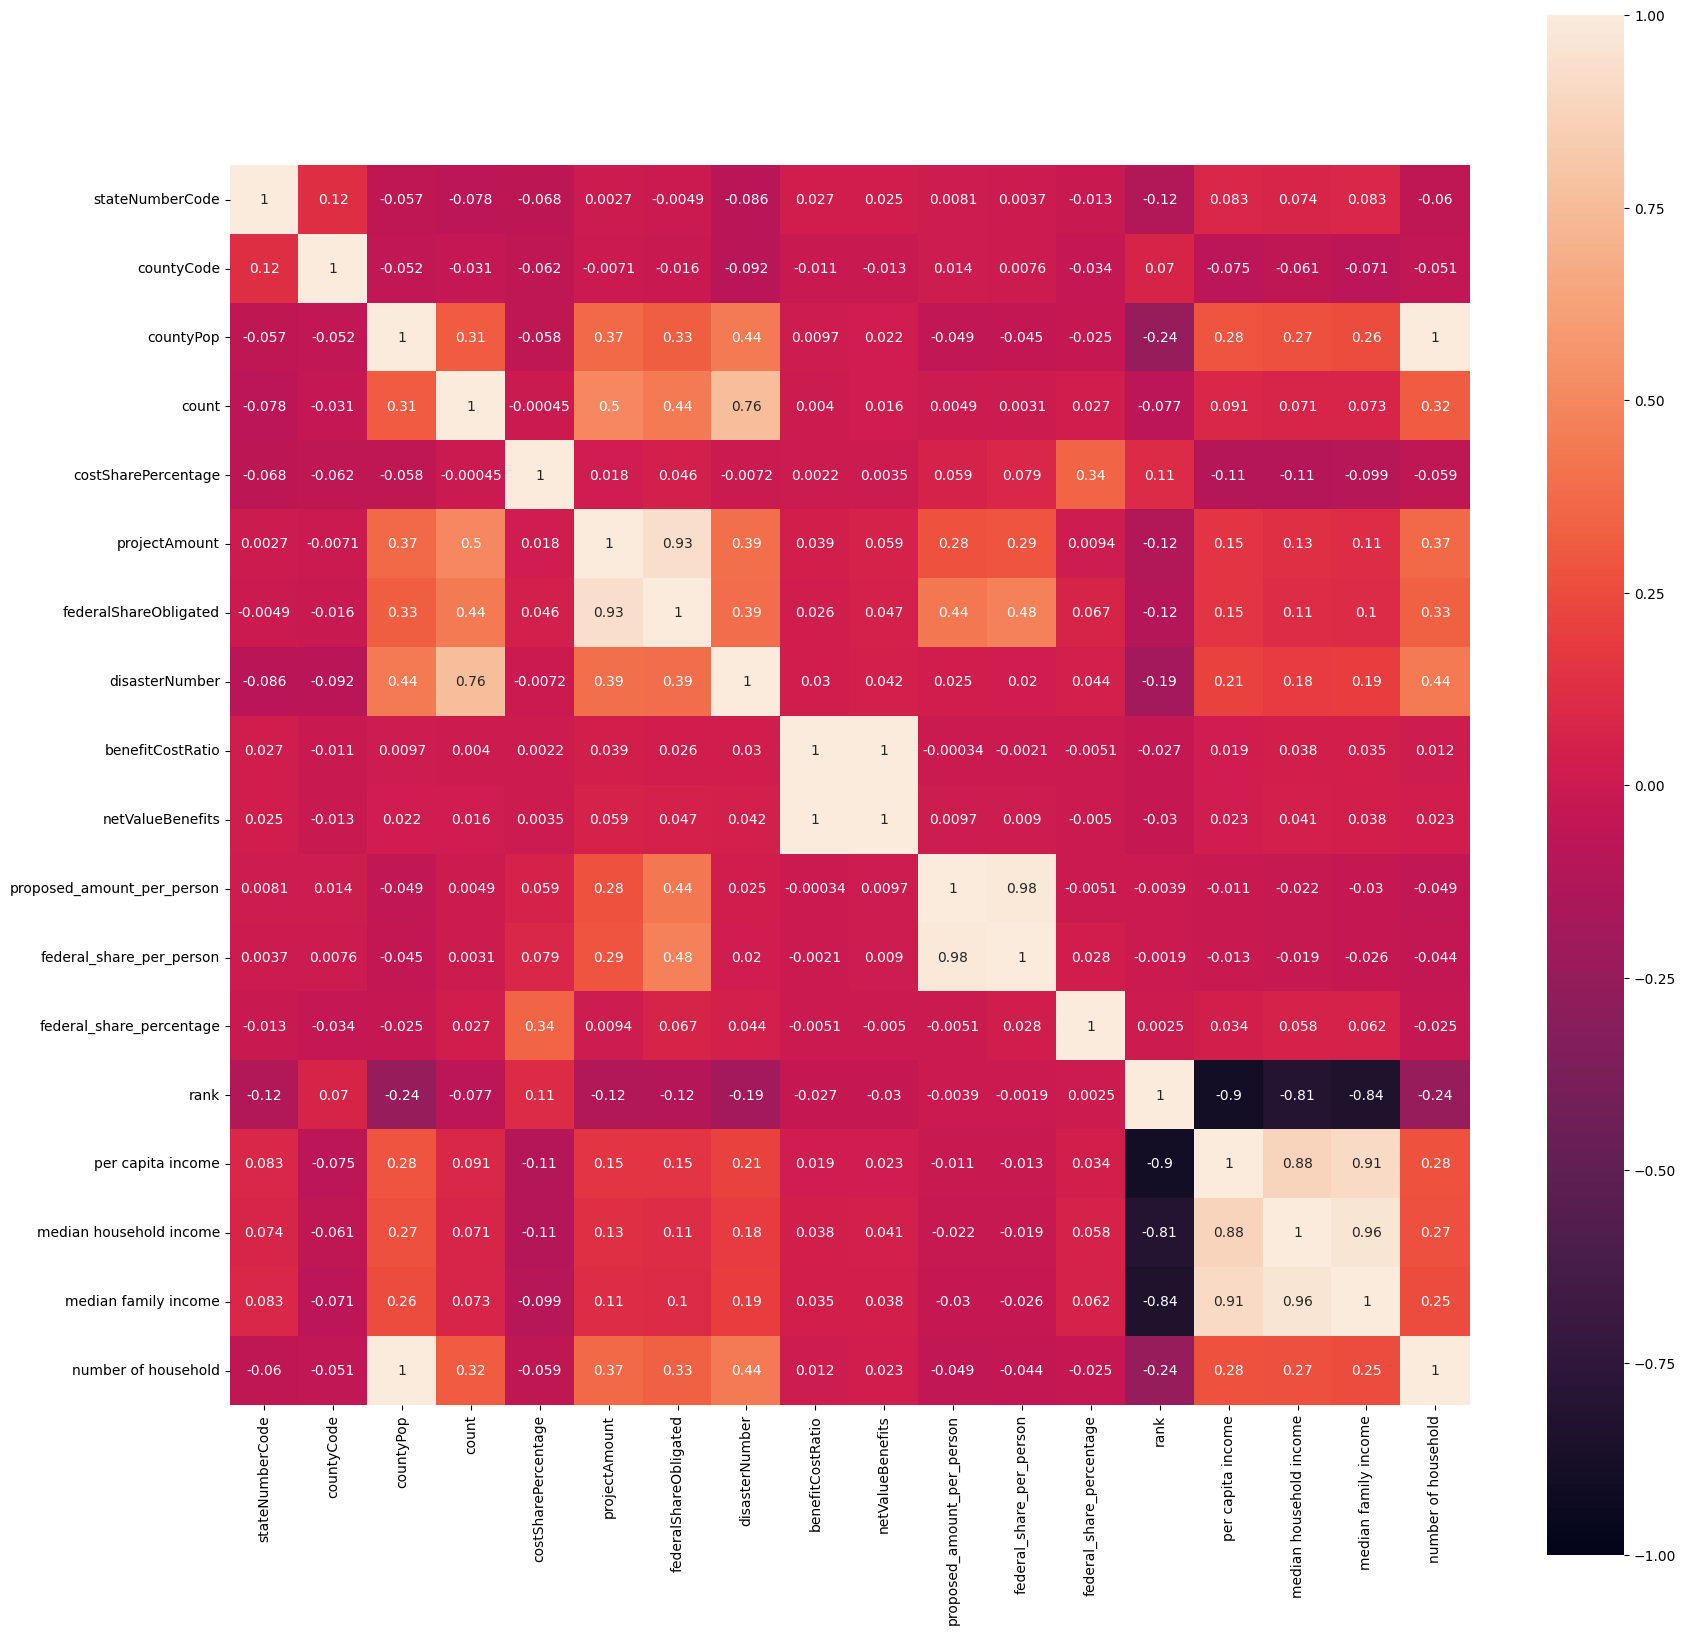

In [ ]:
income_corr = county_project_income.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(income_corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

# GDP

In [ ]:
gdp = pd.read_csv("Datasets/GDP_1997_2021.csv")
gdp.head()


GeoFIPS        GeoName Region TableName  LineCode IndustryClassification  \
0   "00000"  United States           SAGDP1       1.0                    ...   
1   "00000"  United States           SAGDP1       2.0                    ...   
2   "00000"  United States           SAGDP1       3.0                    ...   
3   "00000"  United States           SAGDP1       4.0                    ...   
4   "00000"  United States           SAGDP1       5.0                    ...   

                                        Description  \
0     Real GDP (millions of chained 2012 dollars)     
1          Chain-type quantity indexes for real GDP   
2  Current-dollar GDP (millions of current dollars)   
3                Compensation (millions of dollars)   
4     Gross operating surplus (millions of dollars)   

                               Unit          1997         1998  ...  \
0  Millions of chained 2012 dollars  1.152916e+07  12045824.00  ...   
1                    Quantity index  7.093100e+01        74.11  ...   
2       Millions of current dollars  8.577552e+06   9062817.00  ...   
3       Millions of current dollars  4.713220e+06   5075701.00  ...   
4       Millions of current dollars  3.286531e+06   3384012.00  ...   

         2012          2013          2014          2015          2016  \
0  16253970.0  1.655335e+07  1.693205e+07  1.739030e+07  1.768027e+07   
1       100.0  1.018420e+02  1.041720e+02  1.069910e+02  1.087750e+02   
2  16253970.0  1.684320e+07  1.755069e+07  1.820602e+07  1.869511e+07   
3   8575362.0  8.843637e+06  9.259654e+06  9.709535e+06  9.977096e+06   
4   6600532.0  6.870613e+06  7.108287e+06  7.278526e+06  7.468126e+06   

           2017          2018          2019          2020        2021  
0  1.807908e+07  1.860679e+07  1.903267e+07  1.838469e+07  19427287.0  
1  1.112290e+02  1.144750e+02  1.170960e+02  1.131090e+02     119.523  
2  1.947962e+07  2.052716e+07  2.137258e+07  2.089375e+07  22996086.0  
3  1.043674e+07  1.096981e+07  1.145945e+07  1.158009e+07        (NA)  
4  7.736436e+06  8.158931e+06  8.453733e+06  8.540393e+06        (NA)  

[5 rows x 33 columns]

In [ ]:
gdp.GeoFIPS = gdp.GeoFIPS.str.replace("\"", "").str.strip()
# drop comments in the last 4 rows
gdp.drop(gdp.tail(4).index,inplace = True)
gdp.GeoFIPS.unique()

array(['00000', '01000', '02000', '04000', '05000', '06000', '08000',
       '09000', '10000', '11000', '12000', '13000', '15000', '16000',
       '17000', '18000', '19000', '20000', '21000', '22000', '23000',
       '24000', '25000', '26000', '27000', '28000', '29000', '30000',
       '31000', '32000', '33000', '34000', '35000', '36000', '37000',
       '38000', '39000', '40000', '41000', '42000', '44000', '45000',
       '46000', '47000', '48000', '49000', '50000', '51000', '53000',
       '54000', '55000', '56000', '91000', '92000', '93000', '94000',
       '95000', '96000', '97000', '98000'], dtype=object)

In [ ]:
gdp.dtypes

GeoFIPS                    object
GeoName                    object
Region                     object
TableName                  object
LineCode                  float64
IndustryClassification     object
Description                object
Unit                       object
1997                      float64
1998                      float64
1999                      float64
2000                      float64
2001                      float64
2002                      float64
2003                      float64
2004                      float64
2005                      float64
2006                      float64
2007                      float64
2008                      float64
2009                      float64
2010                      float64
2011                      float64
2012                      float64
2013                      float64
2014                      float64
2015                      float64
2016                      float64
2017                      float64
2018          

In [ ]:
gdp = gdp[gdp.LineCode==3.0]
gdp.drop(gdp.iloc[:, 2:11], axis=1, inplace=True)
gdp.rename(columns= {"GeoName":"state"}, inplace=True)

In [ ]:
gdp.head()

GeoFIPS          state        2000        2001        2002        2003  \
2    00000  United States  10250952.0  10581929.0  10929108.0  11456450.0   
10   01000        Alabama    119851.7    122915.5    127505.0    134152.6   
18   02000         Alaska     26806.6     28494.1     29756.8     32037.9   
26   04000        Arizona    165110.7    171909.6    180522.3    193634.9   
34   05000       Arkansas     68678.5     70616.7     74113.9     78695.1   

          2004        2005        2006        2007  ...        2012  \
2   12217196.0  13039197.0  13815583.0  14474228.0  ...  16253970.0   
10    147715.2    158846.8    166469.0    172975.2  ...    189245.5   
18     35302.4     40356.6     45094.1     49583.7  ...     58283.6   
26    206541.1    227915.9    245957.0    261392.0  ...    271440.0   
34     85199.6     90887.7     95875.1     98381.6  ...    108492.1   

          2013        2014        2015        2016        2017        2018  \
2   16843196.0  17550687.0  18206023.0  18695106.0  19479623.0  20527159.0   
10    194786.9    197406.9    202372.4    207368.4    215085.9    224046.9   
18     57247.7     56484.9     51490.9     50727.7     53089.3     54711.7   
26    278591.6    287666.6    299393.3    313081.4    330416.1    349907.5   
34    113227.3    116139.4    117786.8    119152.4    122350.2    127306.5   

          2019        2020        2021  
2   21372582.0  20893746.0  22996086.0  
10    231171.8    226896.5    247092.5  
18     54547.1     49820.0     54970.1  
26    369988.2    373719.0    411191.8  
34    130839.9    130750.7    144545.4  

[5 rows x 24 columns]

In [ ]:
state_project_gdp = state_project.merge(gdp, on=["state"])

In [ ]:
state_project_gdp

stateNumberCode  stateCount    state  programFy  statePop  \
0                  1           3  Alabama       2001   4451849   
1                  1           3  Alabama       2002   4464034   
2                  1           4  Alabama       2020   4903185   
3                  1           6  Alabama       2007   4597688   
4                  1          14  Alabama       2012   4799069   
..               ...         ...      ...        ...       ...   
662               56           4  Wyoming       2015    582531   
663               56           4  Wyoming       2018    578931   
664               56           6  Wyoming       2011    564487   
665               56           6  Wyoming       2017    584215   
666               56           6  Wyoming       2020    578759   

     costSharePercentage  projectAmount  federalShareObligated  \
0               0.736667      379244.00              281315.00   
1               0.603333      661781.00              460075.00   
2               1.000000      689514.00              682514.00   
3               0.748333     2010414.00             1503000.00   
4               0.729286     1660138.00             1106418.00   
..                   ...            ...                    ...   
662             0.812500      836048.11              634097.65   
663             0.812500      916598.22              697839.94   
664             0.750000     1492391.00              816983.00   
665             0.833333     1187364.31              912781.88   
666             0.786667     1358666.89             1022563.61   

     disasterNumber  benefitCostRatio  ...      2012      2013      2014  \
0            4066.0          0.494333  ...  189245.5  194786.9  197406.9   
1            4197.0          0.000000  ...  189245.5  194786.9  197406.9   
2           18218.0          0.000000  ...  189245.5  194786.9  197406.9   
3           10122.0         60.212667  ...  189245.5  194786.9  197406.9   
4           57118.0          3.291000  ...  189245.5  194786.9  197406.9   
..              ...               ...  ...       ...       ...       ...   
662         16908.0          0.984500  ...   38855.4   39289.8   40310.6   
663         20964.0          2.476250  ...   38855.4   39289.8   40310.6   
664         24042.0          0.938500  ...   38855.4   39289.8   40310.6   
665         25920.0          3.345333  ...   38855.4   39289.8   40310.6   
666         32082.0          0.000000  ...   38855.4   39289.8   40310.6   

         2015      2016      2017      2018      2019      2020      2021  
0    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
1    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
2    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
3    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
4    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
..        ...       ...       ...       ...       ...       ...       ...  
662   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
663   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
664   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
665   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
666   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  

[667 rows x 37 columns]

In [ ]:
# add county population to risk
stGDPlist = []
for index, row in state_project_gdp.iterrows():
  year = row['programFy']
  col = str(year - 1)
  stGDPlist.append(row[col])

state_project_gdp = state_project_gdp.assign(GDP = stGDPlist)
display(state_project_gdp.shape)
state_project_gdp.columns

(667, 38)

Index(['stateNumberCode', 'stateCount', 'state', 'programFy', 'statePop',
       'costSharePercentage', 'projectAmount', 'federalShareObligated',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'proposed_amount_per_person', 'federal_share_per_person',
       'federal_share_percentage', 'GeoFIPS', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'GDP'],
      dtype='object')

In [ ]:
state_project_gdp.drop(state_project_gdp.iloc[:,15:37], axis=1, inplace=True)


In [ ]:
state_project_gdp.head()

stateNumberCode  stateCount    state  programFy  statePop  \
0                1           3  Alabama       2001   4451849   
1                1           3  Alabama       2002   4464034   
2                1           4  Alabama       2020   4903185   
3                1           6  Alabama       2007   4597688   
4                1          14  Alabama       2012   4799069   

   costSharePercentage  projectAmount  federalShareObligated  disasterNumber  \
0             0.736667       379244.0               281315.0          4066.0   
1             0.603333       661781.0               460075.0          4197.0   
2             1.000000       689514.0               682514.0         18218.0   
3             0.748333      2010414.0              1503000.0         10122.0   
4             0.729286      1660138.0              1106418.0         57118.0   

   benefitCostRatio  netValueBenefits  proposed_amount_per_person  \
0          0.494333      8.831567e+04                    0.085188   
1          0.000000      0.000000e+00                    0.148247   
2          0.000000      0.000000e+00                    0.140626   
3         60.212667      3.720314e+06                    0.437266   
4          3.291000      9.455278e+05                    0.345929   

   federal_share_per_person  federal_share_percentage GeoFIPS       GDP  
0                  0.063191                  0.741778   01000  119851.7  
1                  0.103063                  0.695207   01000  122915.5  
2                  0.139198                  0.989848   01000  231171.8  
3                  0.326903                  0.747607   01000  166469.0  
4                  0.230548                  0.666461   01000  183916.6

In [ ]:
state_project_gdp["GDP per capita"] = state_project_gdp["GDP"] / state_project_gdp["statePop"]

In [ ]:
state_project_gdp["GDP per capita"].describe()

count    667.000000
mean       0.048275
std        0.016499
min        0.023057
25%        0.038665
50%        0.045653
75%        0.054825
max        0.204613
Name: GDP per capita, dtype: float64

In [ ]:
# yearly avg GDP
average_year_gdp = pd.DataFrame(state_project_gdp.groupby("programFy").agg({"GDP":"mean", "GDP per capita":"mean"})).reset_index()
average_year_gdp.rename(columns={"GDP":"avg_yearly_GDP", "GDP per capita":"avg_yearly_GDP_per_capita"}, inplace=True)
state_project_gdp = average_year_gdp.merge(state_project_gdp, on=["programFy"])
state_project_gdp

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
0         2001   197349.415152                   0.034874                1   
1         2001   197349.415152                   0.034874                4   
2         2001   197349.415152                   0.034874                5   
3         2001   197349.415152                   0.034874                8   
4         2001   197349.415152                   0.034874               11   
..         ...             ...                        ...              ...   
662       2021   647906.112500                   0.062687               10   
663       2021   647906.112500                   0.062687               28   
664       2021   647906.112500                   0.062687               37   
665       2021   647906.112500                   0.062687               40   
666       2021   647906.112500                   0.062687               51   

     stateCount                 state  statePop  costSharePercentage  \
0             3               Alabama   4451849             0.736667   
1             5               Arizona   5166697             0.716000   
2            64              Arkansas   2678288             0.750000   
3             5              Colorado   4328070             0.716000   
4             2  District of Columbia    571744             0.750000   
..          ...                   ...       ...                  ...   
662           1              Delaware    991886             1.000000   
663           2           Mississippi   2956870             0.750000   
664           4        North Carolina  10457177             0.937500   
665           6              Oklahoma   3962031             0.833333   
666           2              Virginia   8632044             0.875000   

     projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
0        379244.00              281315.00          4066.0          0.494333   
1       1912879.00             1283103.00          6735.0          0.813000   
2      37771621.00            28286831.00         86674.0          1.333781   
3        634441.00              471956.00          6870.0          2.127600   
4        313549.00              241821.00          2778.0          0.500000   
..             ...                    ...             ...               ...   
662      170244.99              170244.99          4566.0          0.000000   
663      156816.00              117612.00          9152.0          1.812500   
664      651076.00              596076.00         18341.0          0.000000   
665     1040163.72              816928.80         27462.0          1.658333   
666     1097101.73              579800.86          9204.0          0.000000   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
0        88315.666667                    0.085188                  0.063191   
1       646452.500000                    0.370232                  0.248341   
2       917457.500000                   14.102897                 10.561534   
3       920469.600000                    0.146588                  0.109045   
4       162500.000000                    0.548408                  0.422953   
..                ...                         ...                       ...   
662          0.000000                    0.171638                  0.171638   
663     256288.000000                    0.053034                  0.039776   
664          0.000000                    0.062261                  0.057002   
665     428548.166667                    0.262533                  0.206189   
666          0.000000                    0.127096                  0.067168   

     federal_share_percentage GeoFIPS       GDP  GDP per capita  
0                    0.741778   01000  119851.7        0.026922  
1                    0.670771   04000  165110.7        0.031957  
2                    0.748891   05000   68678.5        0.025643  
3                    0.743893   08000  18

In [ ]:
provide_more = state_project_gdp[state_project_gdp.federal_share_percentage - state_project_gdp.costSharePercentage > 0.05]
provide_more.sort_values(by="GDP per capita")

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
137       2005   276022.558621                   0.039722               28   
33        2002   193830.564286                   0.033518                1   
11        2001   197349.415152                   0.034874               22   
5         2001   197349.415152                   0.034874               12   
32        2001   197349.415152                   0.034874               56   
434       2014   408011.663333                   0.050923               12   
19        2001   197349.415152                   0.034874               36   
213       2007   326757.203125                   0.045106               44   
422       2013   364126.848649                   0.051505               44   
642       2020   478127.957143                   0.064412               37   
593       2019   445300.367568                   0.058170               13   
414       2013   364126.848649                   0.051505               34   
191       2007   326757.203125                   0.045106                9   
326       2011   293183.506667                   0.050834               10   
464       2015   340872.165625                   0.052114                9   

     stateCount           state  statePop  costSharePercentage  projectAmount  \
137         374     Mississippi   2886006             0.866203   3.577131e+08   
33            3         Alabama   4464034             0.603333   6.617810e+05   
11           22       Louisiana   4468979             0.750000   1.483749e+07   
5            92         Florida  16047118             0.803478   9.325799e+07   
32            3         Wyoming    493958             0.636667   1.290360e+05   
434          31         Florida  19545621             0.814516   3.649435e+07   
19           24        New York  18998044             0.742917   2.926403e+08   
213           2    Rhode Island   1060196             0.750000   2.945500e+04   
422          14    Rhode Island   1054621             0.733571   2.627284e+06   
642           7  North Carolina  10488084             0.857143   2.472575e+06   
593          31         Georgia  10511131             0.758065   3.152467e+06   
414         509      New Jersey   8844942             0.764008   3.744907e+08   
191           4     Connecticut   3485162             0.647500   9.157760e+05   
326           3        Delaware    899593             0.583333   3.602470e+05   
464           3     Connecticut   3594524             0.670000   1.348796e+06   

     federalShareObligated  disasterNumber  benefitCostRatio  \
137           3.295764e+08        599886.0          3.362059   
33            4.600750e+05          4197.0          0.000000   
11            1.408875e+07         30337.0          1.791545   
5             8.324356e+07        125400.0          6.239380   
32            9.550200e+04          4053.0          0.373000   
434           3.249797e+07        129487.0          1.516129   
19            2.632993e+08         33384.0          0.146500   
213           2.943700e+04          3408.0          1.515500   
422           2.087877e+06         57372.0          0.294571   
642           2.254820e+06         31433.0          0.657143   
593           2.635876e+06        136400.0          0.000000   
414           3.142687e+08       2079774.0          2.000436   
191           6.600340e+05          6800.0          0.940000   
326           2.372360e+05         12111.0          0.000000   
464           9.738762e+05         12639.0          1.786667   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
137      3.025762e+06                  123.947462                114.198113   
33       0.000000e+00                    0.148247                  0.103063   
11       5.933396e+05                    3.320108                  3.152565   
5        1.476753e+07                    5.811510                  5.187446   
32       4.640333e+04                  

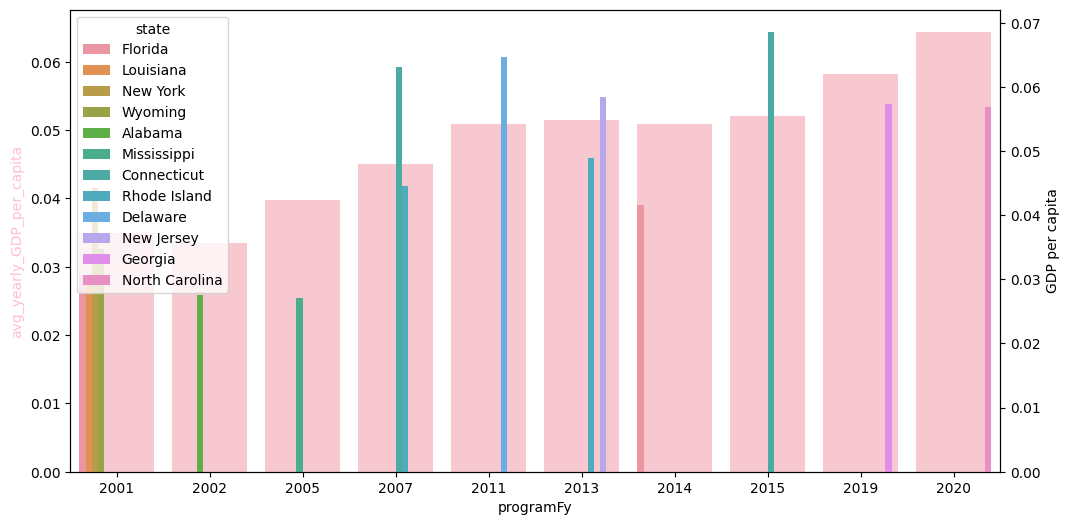

In [ ]:


fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_ylabel('average yearly GDP per capita', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP_per_capita", data=provide_more, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP per capita",hue="state", data=provide_more)

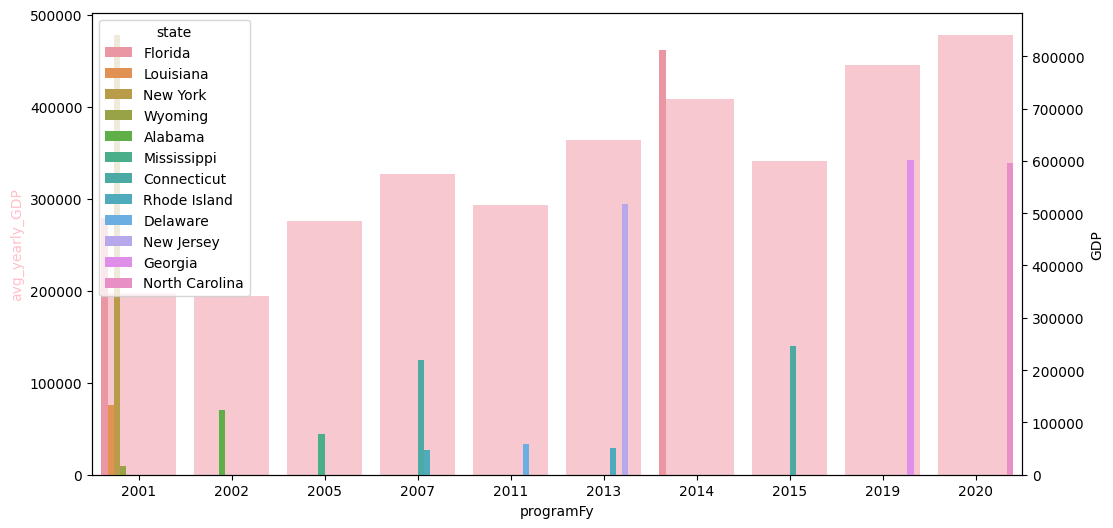

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_ylabel('average yearly GDP', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP", data=provide_more, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP",hue="state", data=provide_more)

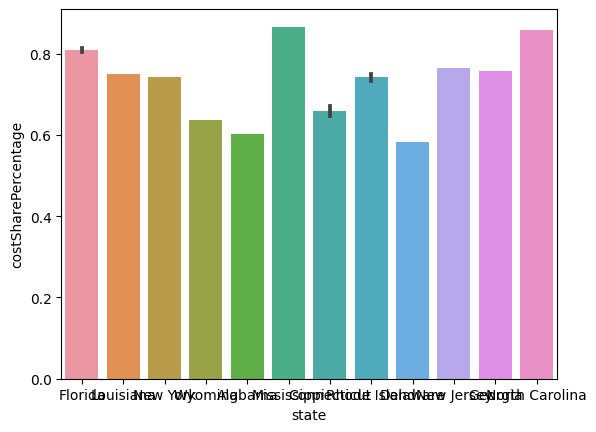

In [ ]:
sns.barplot(x="state", y="costSharePercentage", data=provide_more)

# maybe useless

In [ ]:
# HazardInfo = pd.read_csv('Datasets/NRI_HazardInfo.csv')
# display(HazardInfo)
# display(HazardInfo.dtypes)
# # drop nan, volcanic (bc), hurricane (west/east)
# HazardInfo = HazardInfo.drop([7, 15])
# HazardInfo = HazardInfo.dropna()
# HazardInfo = HazardInfo.astype({"Start": int, "End_":int, "Prefix":str})
# targetHazard = HazardInfo[(HazardInfo.Start>=2001) & (HazardInfo.End_<=2022)]

In [ ]:
#HazardIndicesByCounty = pd.read_csv('Datasets/NRI_Table_Counties.csv')
# hazardColumns = HazardIndicesByCounty.iloc[:,36:].columns
# targetHazardColumns = targetHazard['Prefix']

# print(targetHazardColumns)
# print(hazardColumns)

In [ ]:
# HazardIndicesByCounty.iloc[:, :20]

In [ ]:
# targetColumns = []
# for c in hazardColumns:
#   for tc in targetHazardColumns:
#     if (c[0:4] in tc):
#       targetColumns.append(c)

In [ ]:
# notTarget = set(hazardColumns) - set(targetColumns)
# notTarget

In [ ]:
# targetHazardRisk = HazardIndicesByCounty.drop(columns = list(notTarget))
# targetHazardRisk

In [ ]:
# HazardIndicesByCounty.iloc[:, :20]
# HazardIndicesByCounty[['RISK_SCORE', 'RISK_RATNG']].describe()